In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import statsmodels.api as sm

# Data Preparation

## Daily Stock Log Returns

In [2]:
tickers = pd.read_csv("Data/500/rtn_500.csv").columns[1:].tolist()
csi500_stock_rtn = pd.DataFrame(pd.read_csv("Data/500/rtn_500.csv").iloc[2:,:].values, columns=['Date']+tickers)
csi500_stock_rtn.iloc[:,1:] = csi500_stock_rtn.iloc[:,1:].apply(lambda col: col.str.strip().str.replace(',',''))
csi500_stock_rtn.iloc[:,1:] = np.log(csi500_stock_rtn.iloc[:,1:].astype(float)/100+1)
csi500_stock_rtn['Date'] = pd.to_datetime(csi500_stock_rtn['Date'], format='%Y-%m-%d')
display(csi500_stock_rtn)

,Date,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
0,2019-01-02,0.0,0.001234,0.0,-0.040822,0.0,0.00374,-0.04059,-0.043562,-0.057889,...,0.02975,0.012474,-0.004617,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-03,-0.017648,-0.012407,0.0,-0.033448,0.0,0.03691,-0.002489,-0.015768,0.010462,...,-0.015456,-0.008298,0.003234,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,0.017647,0.018554,0.018928,0.04652,0.0,0.017578,0.026231,0.019371,0.018901,...,0.037035,0.015268,0.041117,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,0.017342,0.037286,0.006231,-0.013072,0.0,0.027399,0.011263,0.010733,0.000851,...,0.032165,0.001892,0.035229,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-08,-0.011527,-0.011876,0.0,0.017392,0.0,0.002944,-0.007226,0.011792,0.0017,...,-0.017596,-0.008861,0.024484,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2022-12-26,0.003603,0.02167,-0.00678,0.032169,0.016852,0.0,0.09536,-0.008067,-0.011322,...,0.093434,-0.000418,0.042786,0.052521,-0.016955,0.051543,0.055005,0.000164,0.008852,0.030914
968,2022-12-27,0.010733,0.008537,0.00678,0.0,0.00088,0.0,-0.062552,0.011713,-0.098781,...,0.038889,0.008337,0.020555,0.019913,0.001029,0.006712,0.04074,-0.012074,-0.006086,-0.011789
969,2022-12-28,0.003553,0.069772,0.0,0.066631,0.027732,0.0,0.011573,-0.016881,-0.008231,...,-0.000524,-0.02352,0.005411,-0.013621,0.023191,-0.005984,-0.007936,-0.011715,-0.005977,0.001846
970,2022-12-29,0.00354,-0.028142,-0.00678,0.00174,-0.02861,0.0,-0.030805,-0.008922,0.000551,...,-0.021093,-0.008536,-0.017694,0.044328,-0.001208,-0.031408,-0.011218,-0.003541,0.022411,0.025349


## Daily Universe Log Returns

In [3]:
csi500_rtn = pd.DataFrame(pd.read_csv("Data/500/Index_500.csv").iloc[2:,:].values, columns=['Date','Return'])
csi500_rtn['Return'] = np.log(csi500_rtn['Return'].astype(float)/100+1)
csi500_rtn['Date'] = pd.to_datetime(csi500_rtn['Date'], format='%Y-%m-%d')
display(csi500_rtn)

,Date,Return
0,2019-01-02,-0.008694
1,2019-01-03,-0.004646
2,2019-01-04,0.023565
3,2019-01-07,0.018225
4,2019-01-08,-0.002574
...,...,...
967,2022-12-26,0.013770
968,2022-12-27,0.007231
969,2022-12-28,-0.004012
970,2022-12-29,-0.000801


## Daily Market Capitalisation

In [4]:
tickers = pd.read_csv("Data/500/MV_500.csv").columns[1:].tolist()
csi500_mc = pd.DataFrame(pd.read_csv("Data/500/MV_500.csv").values, columns=['Date']+tickers)
csi500_mc.iloc[:,1:] = csi500_mc.iloc[:,1:].apply(lambda col: col.str.strip().str.replace(',','')).astype(float)
csi500_mc['Date'] = pd.to_datetime(csi500_rtn['Date'], format='%Y-%m-%d')
display(csi500_mc)

,Date,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
0,2019-01-02,19501087350.009998,21225201637.669998,17186082897.119999,42323451464.148003,0.0,22105376850.0,12896620395.379999,10873478954.82,11903342271.1,...,9388800000.0,19375584800.0,8934096702.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-03,19159960457.59,20963485217.970001,17186082897.119999,41007307527.793999,0.0,22936539019.560001,12864565829.360001,10703376395.959999,12028530796.299999,...,9244800000.0,19215456000.0,8963036395.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,19501087350.009998,21356059847.52,17514479385.599998,42763218656.098999,0.0,23343277953.599998,13206481200.24,10912733391.48,12258043092.5,...,9593600000.0,19511078400.0,9339252406.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,19842214242.43,22167380748.59,17623944881.759998,42431431284.639,0.0,23991702341.200001,13356069175.0,11030496701.459999,12268475469.6,...,9907200000.0,19548031200.0,9674125999.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-08,19614796314.150002,21905664328.889999,17623944881.759998,43132164456.913002,0.0,24062439547.119999,13259905476.940001,11161344823.66,12289340223.799999,...,9734400000.0,19375584800.0,9913912028.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2022-12-26,20406842082.060001,26280218207.849998,15727308844.379999,48065264713.375,23649600000.0,27357614389.560001,30097100529.759998,17757917174.759998,21071717062.0,...,38375336769.199997,14713373200.0,23086584014.237999,20280752699.639999,38158572300.900002,18114201252.240002,23318982960.0,24722967001.810001,29521797559.759998,31638334320.0
968,2022-12-27,20627059802.369999,26505557699.450001,15834297339.92,48050316538.334,23670400000.0,27357614389.560001,28272127237.200001,17967141530.279999,19089723873.0,...,39897117365.220001,14836549200.0,23505348710.622002,20688654735.759998,38197878617.650002,18236193506.759998,24288607200.0,24426275140.700001,29342670790.400002,31267534968.0
969,2022-12-28,20700465709.139999,28420943378.049999,15834297339.92,51674091258.161003,24336000000.0,27357614389.560001,28601220781.759998,17666381519.220001,18933250726.5,...,39876223352.459999,14491656400.0,23691880918.891998,20408755430.639999,39094062639.550003,18127389604.080002,24096602400.0,24141776095.799999,29167808944.119999,31325321880.0
970,2022-12-29,20773871615.91,27632255157.450001,15727308844.379999,51784378247.814003,23649600000.0,27357614389.560001,27733610527.919998,17509463252.580002,18943682269.599998,...,39043945177.519997,14368480400.0,23249756723.736,21333788500.0,39046895059.449997,17566884650.880001,23827795680.0,24056426382.330002,29828872021.52,32129523072.0


## Daily Turnover

In [5]:
tickers = pd.read_csv("Data/500/Turnover_500.csv").columns[1:].tolist()
csi500_turnover = pd.DataFrame(pd.read_csv("Data/500/Turnover_500.csv").iloc[2:,:].values, columns=['Date']+tickers)
csi500_turnover.iloc[:,1:] = csi500_turnover.iloc[:,1:].astype(float)/100
csi500_turnover['Date'] = pd.to_datetime(csi500_turnover['Date'], format='%Y-%m-%d')
display(csi500_turnover)

,Date,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
0,2019-01-02,0.003433,0.005296,0.002178,0.003018,0.0,0.005928,0.008724,0.005783,0.009767,...,0.040103,0.014367,0.158786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-03,0.003219,0.004368,0.002964,0.004701,0.0,0.010461,0.004465,0.005547,0.005891,...,0.037868,0.016913,0.155795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,0.003332,0.002919,0.004445,0.005513,0.0,0.006857,0.006396,0.004994,0.008783,...,0.051867,0.030056,0.240993,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,0.003511,0.005175,0.004358,0.003829,0.0,0.011448,0.006056,0.00422,0.008987,...,0.063585,0.030634,0.280259,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-08,0.002178,0.003752,0.00341,0.003057,0.0,0.007186,0.003907,0.004744,0.005115,...,0.034487,0.012333,0.390638,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2022-12-26,0.003315,0.006368,0.003666,0.006602,0.012192,0.0,0.117646,0.003767,0.025086,...,0.03614,0.001597,0.015222,0.029761,0.013739,0.037081,0.014877,0.009563,0.011474,0.005032
968,2022-12-27,0.003606,0.006305,0.00418,0.004468,0.008702,0.0,0.119516,0.004073,0.050044,...,0.030079,0.00171,0.01918,0.026351,0.012857,0.030926,0.01731,0.011429,0.023082,0.004352
969,2022-12-28,0.004687,0.03934,0.002587,0.014695,0.040637,0.0,0.093896,0.003702,0.024214,...,0.02459,0.001718,0.019591,0.022118,0.021592,0.0303,0.016728,0.009947,0.013251,0.003536
970,2022-12-29,0.003511,0.017121,0.001447,0.007151,0.020722,0.0,0.064884,0.006183,0.01933,...,0.015974,0.002427,0.010022,0.051902,0.018167,0.038067,0.006912,0.008493,0.017834,0.003062


## Daily P/B

In [6]:
tickers = pd.read_csv("Data/500/PB_500.csv").columns[1:].tolist()
csi500_pb = pd.DataFrame(pd.read_csv("Data/500/PB_500.csv").values, columns=['Date']+tickers)
csi500_pb.iloc[:,1:] = csi500_pb.iloc[:,1:].astype(float)
csi500_pb['Date'] = pd.to_datetime(csi500_pb['Date'], format='%Y/%m/%d')
display(csi500_pb)

,Date,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ,Unnamed: 501
0,2019-01-02,1.7466,1.3348,0.8522,1.0478,0.0,2.8642,1.5259,0.7716,1.5183,...,2.1556,8.0379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2019-01-03,1.7161,1.3183,0.8522,1.0134,0.0,2.9719,1.5221,0.7596,1.5343,...,2.1378,8.064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2019-01-04,1.7466,1.343,0.8685,1.0616,0.0,3.0246,1.5626,0.7744,1.5635,...,2.1706,8.4024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2019-01-07,1.7772,1.394,0.8739,1.0478,0.0,3.1086,1.5803,0.7828,1.5649,...,2.1748,8.7037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2019-01-08,1.7568,1.3776,0.8739,1.0662,0.0,3.1178,1.5689,0.7921,1.5675,...,2.1556,8.9195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2022-12-26,1.0714,1.6444,0.7294,1.3742,2.7249,2.8991,2.7789,1.0556,2.1459,...,1.9932,3.5952,8.333,6.2379,4.8722,5.0196,3.8143,2.5962,12.3587,NaN
968,2022-12-27,1.083,1.6585,0.7344,1.3742,2.7273,2.8991,2.6104,1.068,1.944,...,2.0099,3.6699,8.5006,6.2444,4.905,5.2283,3.7685,2.5805,12.2139,NaN
969,2022-12-28,1.0868,1.7783,0.7344,1.4689,2.804,2.8991,2.6408,1.0502,1.9281,...,1.9632,3.6898,8.3856,6.3909,4.8757,5.187,3.7246,2.5651,12.2365,NaN
970,2022-12-29,1.0907,1.729,0.7294,1.4714,2.7249,2.8991,2.5607,1.0408,1.9291,...,1.9465,3.6251,8.7657,6.3832,4.725,5.1291,3.7115,2.6233,12.5506,NaN


## Fundamentals Report Publish Dates

In [7]:
tickers = pd.read_excel("Data/500/Report_Date_500.xlsx").columns[1:].tolist()
ff_report_indices = sum([[str(yr)+period for period in ['Q1','H1','Q3','A']] for yr in range(2019,2023)],[])
csi500_report_dates = pd.DataFrame(pd.read_excel("Data/500/Report_Date_500.xlsx").iloc[1:,1:], columns=tickers)
csi500_report_dates.insert(0,'Report Period',ff_report_indices)
csi500_report_dates

# Function to generate desired date based on report period
def get_fill_date(period):
    year = int(period[:4])
    quarter = period[4:]

    # Some publish dates are missing and thus filled with following dates
    if quarter == 'Q1':
        return f'{year}-04-25'
    elif quarter == 'H1':
        return f'{year}-08-25'
    elif quarter == 'Q3':
        return f'{year}-10-25'
    elif quarter == 'A':
        return f'{year + 1}-03-25'
    else:
        return None

# Function to fill missing values in a row
def fill_missing_dates(row):
    fill_date = get_fill_date(row['Report Period'])
    row = row.fillna(fill_date)
    return row

# convert any empty cells occupied by '--' to NaN first
csi500_report_dates.replace('--', np.nan, inplace=True)

# Apply the function row-wise
csi500_report_dates = csi500_report_dates.apply(fill_missing_dates, axis=1)

# convert all publish date strings to datetime format
csi500_report_dates[tickers] = csi500_report_dates[tickers].apply(lambda col: pd.to_datetime(col,format='%Y-%m-%d'))
display(csi500_report_dates)

,Report Period,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
1,2019Q1,2019-04-30,2019-04-25,2019-04-26,2019-04-26,2019-04-25,2019-04-26,2019-04-27,2019-04-30,2019-04-27,...,2019-04-26,2019-04-27,2019-04-29,2019-05-16,2019-04-25,2019-04-25,2019-04-25,2019-04-25,2019-04-25,2019-04-25
2,2019H1,2019-08-30,2019-08-30,2019-08-23,2019-08-24,2020-01-03,2019-08-24,2019-08-28,2019-08-09,2019-08-22,...,2019-08-28,2019-08-24,2019-08-06,2019-08-16,2019-08-25,2019-11-22,2019-08-27,2019-10-11,2020-01-03,2019-08-25
3,2019Q3,2019-10-30,2019-10-29,2019-10-30,2019-10-25,2019-10-25,2019-10-25,2019-10-29,2019-10-23,2019-10-30,...,2019-10-29,2019-10-26,2019-10-18,2019-10-26,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25,2019-10-25
4,2019A,2020-04-02,2020-03-31,2020-03-20,2020-03-26,2021-04-07,2020-03-31,2020-04-22,2020-04-30,2020-03-21,...,2020-04-24,2020-03-28,2020-03-24,2020-04-28,2020-04-20,2020-06-22,2020-04-23,2020-07-30,2020-08-28,2021-07-02
5,2020Q1,2020-04-30,2020-04-28,2020-04-29,2020-04-29,2020-04-25,2020-04-30,2020-04-29,2020-04-30,2020-04-25,...,2020-04-29,2020-04-25,2020-04-28,2020-04-28,2020-05-11,2020-06-22,2020-06-24,2020-04-25,2020-04-25,2020-06-22
6,2020H1,2020-08-29,2020-08-25,2020-08-28,2020-08-21,2020-08-31,2020-08-22,2020-08-26,2020-08-25,2020-08-25,...,2020-08-27,2020-08-22,2020-08-10,2020-08-14,2020-08-22,2020-08-25,2020-07-27,2020-07-30,2020-08-28,2020-10-13
7,2020Q3,2020-10-31,2020-10-30,2020-10-30,2020-10-29,2020-10-25,2020-10-30,2020-10-30,2020-10-29,2020-10-30,...,2020-10-28,2020-10-28,2020-10-30,2020-10-29,2020-10-29,2020-10-27,2020-10-29,2020-10-29,2020-10-28,2020-11-03
8,2020A,2021-04-07,2021-03-30,2021-03-31,2021-03-31,2021-04-07,2021-03-31,2021-04-28,2021-04-27,2021-03-19,...,2021-04-29,2021-03-20,2021-03-19,2021-04-23,2021-03-31,2021-03-31,2021-04-23,2021-03-31,2021-04-20,2021-07-02
9,2021Q1,2021-04-30,2021-04-28,2021-04-29,2021-04-30,2021-05-24,2021-04-30,2021-04-28,2021-04-27,2021-04-28,...,2021-04-29,2021-04-27,2021-04-24,2021-04-28,2021-04-27,2021-04-23,2021-04-29,2021-04-29,2021-04-27,2021-07-02
10,2021H1,2021-08-28,2021-08-24,2021-08-27,2021-08-28,2021-08-28,2021-08-28,2021-08-25,2021-08-31,2021-08-24,...,2021-08-27,2021-08-21,2021-08-28,2021-08-26,2021-08-20,2021-08-26,2021-08-27,2021-08-20,2021-08-21,2021-08-20


## Fundamentals: Net Profit

In [8]:
csi500_netprofit = pd.read_csv("Data/500/Net_Profit_500.csv").iloc[:,1:]
csi500_netprofit.insert(0,'Report Period',ff_report_indices)
csi500_netprofit.iloc[:,1:] = csi500_netprofit.iloc[:,1:].apply(lambda col: col.str.strip().str.replace(',','')).astype(float)
display(csi500_netprofit)

,Report Period,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
0,2019Q1,113581832.75,487185007.09,160708752.61,1101542000.0,0.0,74686229.71,513157824.73,50489624.38,332536898.8,...,92254128.88,299950417.0,26217215.52,74860541.8,138037520.28,9401545.1,93991600.0,0.0,0.0,33966500.0
1,2019H1,401322718.81,1212938120.87,737677135.67,2160611000.0,438700800.0,235055801.27,851223146.73,111987853.06,646246716.69,...,227664637.56,579913527.0,58836570.54,148006988.22,338436040.38,30986759.7,221569673.7,255636500.05,230366932.07,63034500.0
2,2019Q3,669583112.96,1811403333.18,742473607.47,3394298000.0,0.0,398684390.68,1191000259.31,339815909.29,930365840.14,...,337394785.08,850151356.0,106189817.41,225236599.82,560348008.47,56345191.68,318545081.45,460415409.8,405307016.49,99122200.0
3,2019A,1091511496.71,2017827810.67,905674128.25,4438544000.0,633669425.62,588308525.52,1255130714.27,806894177.38,1066456218.9,...,374415101.05,1253966474.0,156588129.99,305158611.98,772608984.84,99830475.56,408591622.18,721734458.99,547199216.33,144311492.85
4,2020Q1,108255479.59,405343379.56,156840369.63,1599560000.0,43855424.26,48586975.36,310445582.99,101284123.96,276356528.87,...,84247599.39,271972140.0,35910385.69,71658899.84,110749641.17,27183741.97,119605579.42,138644147.13,320042470.88,24419247.75
5,2020H1,477420001.63,1453202996.34,649371150.99,3182069000.0,304600217.25,293438352.17,882090440.17,473963309.09,560420556.29,...,246582383.06,554359553.0,91422056.71,161649710.79,475729831.6,100315856.66,221821713.08,276165251.98,1034680676.1,121014540.48
6,2020Q3,1042934719.27,2253345741.08,1154732813.24,4826256000.0,521489745.0,482587323.5,1416249248.25,785409697.25,881878136.47,...,444006554.9,834849219.0,152826941.22,256958870.06,698365587.42,258823335.02,327588262.26,561656813.42,3163073572.94,185783131.73
7,2020A,1601916130.37,1911308227.68,1579634389.37,5776735000.0,524852980.6,757923893.34,1386080546.67,1525567216.96,1013496075.39,...,511777728.4,1200176146.0,244681463.59,373154827.32,939147382.47,424720562.99,452613272.71,894869336.24,3822549060.24,271350653.13
8,2021Q1,347567605.83,751521836.61,970138971.29,1701393000.0,24759330.37,158477261.38,268923247.05,294141537.21,297164529.4,...,209599951.05,281409483.0,101703360.48,73584878.77,168144761.01,72928713.54,190808378.51,213906235.22,480806327.63,61684924.12
9,2021H1,1580935263.28,1506617388.93,3205907057.75,3960102000.0,322569298.13,375342390.12,775704617.8,592975419.31,622599336.98,...,454268164.59,540525448.0,220583048.46,177835288.52,428611762.39,175283833.3,367707115.63,429262233.29,761119937.32,196642876.9


## Fundamentals: Operating Profit

In [9]:
csi500_opprofit = pd.read_csv("Data/500/Operating_Profit_500.csv").iloc[:,1:]
csi500_opprofit.insert(0,'Report Period',ff_report_indices)
csi500_opprofit.iloc[:,1:] = csi500_opprofit.iloc[:,1:].apply(lambda col: col.str.strip().str.replace(',','')).astype(float)
display(csi500_opprofit)

,Report Period,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
0,2019Q1,175045798.75,556747061.51,175919839.03,1409983000.0,0.0,92563529.66,681373892.91,43268287.88,402389276.36,...,107683902.81,339650519.0,31417225.02,87588372.49,160580017.6,11031998.58,116114900.0,0.0,0.0,39216300.0
1,2019H1,609591231.23,1415262539.39,947921011.63,2685264000.0,554283800.0,271725495.7,1123810272.2,91836293.71,761566632.68,...,267263523.54,665639834.0,68409655.87,174246810.54,393173576.24,36513433.08,260099964.08,309207265.51,270979247.5,0.0
2,2019Q3,954908337.85,2109826511.5,1071445702.08,4127780000.0,0.0,450679085.92,1561539389.89,318576388.62,1096242764.49,...,397755326.88,981908047.0,119966752.35,265156621.06,651043634.84,66841866.46,388003964.0,560113865.03,480268626.81,0.0
3,2019A,1587177690.89,2488430727.45,1089225678.87,5493272000.0,787939999.15,674023605.65,1689389051.32,737302056.25,1262485573.21,...,427933926.56,1447352707.0,178569217.36,354560898.71,898924261.47,114169465.45,518636724.62,805542728.37,641771043.18,166755655.05
4,2020Q1,204404912.53,515224629.72,244462322.46,2042928000.0,45237316.78,59628888.2,416594630.63,144010299.52,341365799.17,...,100940834.95,318386408.0,42454367.18,85944487.18,127050662.79,32014973.8,144428326.87,176332585.97,381849972.55,28941755.17
5,2020H1,751499090.17,1747677248.16,858348966.76,3835300000.0,351272770.13,331851559.44,1196598900.29,569641348.71,670259455.75,...,285454903.53,649860715.0,105541211.58,192411123.25,553349732.11,121059768.28,265175024.36,330994194.8,1216758225.26,141357530.45
6,2020Q3,1435530309.37,2715836425.17,1607470827.78,5635042000.0,607470221.73,548339836.06,1904292411.99,901416246.75,1058035959.49,...,506479948.88,978292549.0,170033824.33,305051363.13,812097131.7,307788314.08,380825352.6,658911467.76,3700869075.77,215799068.74
7,2020A,2237911861.97,2496317283.71,2038069193.53,6764610000.0,605353593.22,841789760.06,1939186551.94,1630185161.69,1229264456.77,...,580931470.58,1398281572.0,281526809.81,434041794.36,1098563155.5,497031659.38,534189333.22,1006921201.28,4531737241.56,312271418.75
8,2021Q1,470126017.19,978792924.57,1223750558.07,2107195000.0,33460845.08,191391859.98,356532460.6,331345302.68,358500072.98,...,255666990.78,331059851.0,111914260.36,85115732.12,203235312.87,82573038.98,213436135.79,256393953.51,576666997.98,70810290.03
9,2021H1,1838729052.59,1904365464.94,4028394796.45,4599762000.0,370483667.52,446522165.71,965673365.21,676820825.71,729867989.83,...,510662379.46,628961177.0,247550396.84,202909979.55,495500982.97,197977905.2,428470865.69,465751798.79,910569685.56,226363788.17


## Fundamentals: Total Revenue (Sales)

In [10]:
csi500_sales = pd.read_csv("Data/500/Total_Revenue_500.csv").iloc[:,1:]
csi500_sales.insert(0,'Report Period',ff_report_indices)
csi500_sales.iloc[:,1:] = csi500_sales.iloc[:,1:].apply(lambda col: col.str.strip().str.replace(',','')).astype(float)
display(csi500_sales)

,Report Period,600008.SH,600021.SH,600022.SH,600027.SH,600032.SH,600038.SH,600056.SH,600060.SH,600062.SH,...,300724.SZ,300741.SZ,300748.SZ,300776.SZ,300832.SZ,300850.SZ,300861.SZ,300866.SZ,300888.SZ,301029.SZ
0,2019Q1,2448004021.45,5828390368.04,13843088339.629999,23380037000.0,0.0,2387236406.17,8244790655.23,7622223079.88,2632966213.66,...,529531890.16,443726725.0,358860291.95,165431076.18,315130386.43,103837479.82,312180000.0,0.0,0.0,166648900.0
1,2019H1,5748271702.29,11538354259.18,32354849955.310001,43701904000.0,1149333700.0,6900416438.64,16860206898.26,15103814109.58,4865561997.67,...,1218286126.16,976059588.0,780263209.14,341498350.52,740198333.21,275948264.91,618188850.57,2833024940.62,2105441289.35,328878000.0
2,2019Q3,9153757423.83,17684284006.639999,52980193193.139999,67457282000.0,0.0,10528816371.379999,26025589473.66,23643718009.880001,7406741940.89,...,1804197001.77,1497567825.0,1169538523.85,518213785.2,1186989592.98,421449422.92,914809452.24,4544146035.78,3118665650.14,537601300.0
3,2019A,14907273552.24,23690034551.139999,71091690306.149994,93654431000.0,2102378361.67,15795174248.91,35284824314.75,34104738789.950001,9380989927.549999,...,2527163536.21,2185338829.0,1696838476.01,699947911.93,1681588076.26,643096990.35,1193293374.33,6654738184.93,4574625915.6,761000568.35
4,2020Q1,2926479447.61,5568230517.27,19390834246.18,22116437000.0,459178852.63,1951838260.41,7485116949.03,6764049146.38,2182125834.68,...,494098072.67,445224013.0,413131944.95,201255861.77,288752653.3,144878452.17,304410228.18,1536572827.32,1482975289.36,155353679.33
5,2020H1,6956355846.21,11792127051.700001,40149850584.75,41531486000.0,1201074023.34,7677268521.96,18809226059.459999,15900745176.26,4147116544.19,...,1892605524.61,935648932.0,963410912.05,446542273.56,970101563.31,542275496.68,584175632.97,3527713393.54,4179778883.27,535406927.76
6,2020Q3,11576326566.559999,18071163409.93,63919904178.730003,63815786000.0,1836501563.7,12187045712.4,30267274807.700001,27480152528.459999,6373707849.7,...,3084067379.49,1442842489.0,1616257295.36,711811898.65,1570375155.05,1310765090.4,871325226.62,6018588473.84,9523149008.700001,829493065.22
7,2020A,19224603589.299999,24202837810.41,87316707290.570007,90744016000.0,2346514155.75,19654751084.32,39311753472.089996,39314718113.160004,8503938229.78,...,4044249652.71,2094459854.0,2417345831.19,1072283270.44,2194966537.25,2064401044.11,1205320762.44,9352629343.290001,12533945946.629999,1209680515.15
8,2021Q1,4236313605.46,7201974939.44,26676659024.709999,29263011000.0,481338641.01,3199962078.08,8571905223.52,10377754603.360001,2407751720.57,...,1177039946.47,467110062.0,793345464.15,274252605.59,532371365.53,561544544.37,362683330.08,2426873839.61,2268544975.62,319380941.64
9,2021H1,8626134226.42,14270303683.09,58833896864.919998,53478297000.0,1319098314.11,9391997387.459999,18265345185.240002,20957890515.880001,4629988963.08,...,2623547750.31,916678395.0,1808834851.93,600408203.02,1225706671.9,1260676911.25,826633220.84,5370576888.61,4059865654.92,851788697.34


# Generate Style Factors

## Beta

In [11]:
def get_beta(stock_rtn, universe_rtn, date, ticker, T=252, half_life=63, hsigma_input=False):
    '''
    Obtain the beta for a stock on a particular trading day
    Note: earliest possible date = '2020-01-13'
    '''

    # locate the row index of our interested date
    day_idx = stock_rtn[stock_rtn['Date'] == date][ticker].index[0]

    if day_idx < T - 1:
        print('Insufficient Data Range Provided!')
        return

    # approximated daily risk-free rates assuming an annual range between 1-2%
    np.random.seed(2023)
    rf = np.random.uniform(0.01/252, 0.03/252, stock_rtn.shape[0])

    # helper function to get excess return series for both stocks and cap-weighted universe
    gen_excess_rtn = lambda rtn_series,target: rtn_series.iloc[day_idx-T+1:day_idx+1,:][target] - rf[day_idx-T+1:day_idx+1]

    excess_stock_return = gen_excess_rtn(stock_rtn,ticker).astype(float)
    excess_universe_return = gen_excess_rtn(universe_rtn,'Return').astype(float)

    # generate exponential weights for Weighted Least Square (WLS) regression
    T_0 = half_life / np.log(2)
    exp_weights = np.exp(-(T - np.arange(1,T+1)) / T_0)

    # Weighted Regression to calculate beta
    X = sm.add_constant(excess_universe_return.values)  # Add constant to get intercept (alpha)
    model = sm.WLS(excess_stock_return.values, X, weights=exp_weights).fit()

    # later we will re-use get_beta within the get_HSIGMA function for computing volatility of residuals
    if hsigma_input:
        return excess_universe_return.values, model.resid

    # Extract beta
    beta = model.params[1]
    return beta

In [12]:
get_beta(csi500_stock_rtn,csi500_rtn,'2021-06-01','300748.SZ')

1.206574365764037

In [13]:
get_beta(csi500_stock_rtn,csi500_rtn,'2021-06-01','600008.SH')

0.3026842344527949

## Momentum - RSTR

In [14]:
def get_RSTR(stock_rtn, date, ticker, T=504, half_life=126, lag=21):
    '''
    Obtain the RSTR for a stock on a particular trading day
    Note: earliest possible date = '2021-03-03'
    '''

    # locate the row index of our interested date
    day_idx = stock_rtn[stock_rtn['Date'] == date][ticker].index[0]

    if day_idx + 1 - lag < T:
        print('Insufficient Data Range Provided!')
        return

    # approximated daily risk-free rates assuming an annual range between 1-2%
    np.random.seed(2023)
    rf = np.random.uniform(0.01/252, 0.03/252, stock_rtn.shape[0])

    log_rf = rf[day_idx-T-lag+1:day_idx+1-lag]
    excess_log_rtn = stock_rtn.iloc[day_idx-T-lag+1:day_idx+1-lag,:][ticker] - log_rf

    # generate exponential weights for RSTR
    T_0 = half_life / np.log(2)
    exp_weights = np.exp(-(T - np.arange(1,T+1)) / T_0)

    return sum(exp_weights*excess_log_rtn)

In [15]:
get_RSTR(csi500_stock_rtn,'2021-06-01','300748.SZ')

0.0023790986075273167

In [16]:
get_RSTR(csi500_stock_rtn,'2021-06-01','600008.SH')

-0.04088905969796533

## Residual Volativity

### Residual Vol - DASTD

In [17]:
def get_DASTD(stock_rtn, date, ticker, T=252, half_life=42):
    '''
    Type: Residual Volativity
    Obtain the Daily Standard Deviation of Excess Log Returns for a stock on a particular trading day
    Note: earliest possible date = '2020-01-13'
    '''

    # locate the row index of our interested date
    day_idx = stock_rtn[stock_rtn['Date'] == date][ticker].index[0]

    if day_idx < T - 1:
        print('Insufficient Data Range Provided!')
        return

    # approximated daily risk-free rates assuming an annual range between 1-2%
    np.random.seed(2023)
    rf = np.random.uniform(0.01/252, 0.03/252, stock_rtn.shape[0])

    excess_stock_return = stock_rtn.iloc[day_idx-T+1:day_idx+1,:][ticker] - rf[day_idx-T+1:day_idx+1]

    # generate exponential weights for Weighted Least Square (WLS) regression
    T_0 = half_life / np.log(2)
    exp_weights = np.exp(-(T - np.arange(1,T+1)) / T_0)

    return (exp_weights*excess_stock_return).std()

In [18]:
get_DASTD(csi500_stock_rtn,'2021-06-01','300748.SZ')

0.010427889256154024

In [19]:
get_DASTD(csi500_stock_rtn,'2021-06-01','600008.SH')

0.005237386560113098

### Residual Vol - CMRA

In [20]:
def get_CMRA(stock_rtn, date, ticker, T=12, period=21):
    '''
    Type: Residual Volativity
    Obtain the CMRA for a stock on a particular trading day
    Note: earliest possible date = '2020-01-13'
    '''

    # locate the row index of our interested date
    day_idx = stock_rtn[stock_rtn['Date'] == date][ticker].index[0]

    if day_idx + 1 < T*period:
        print('Insufficient Data Range Provided!')
        return

    # approximated daily risk-free rates assuming an annual range between 1-2%
    np.random.seed(2023)
    rf = np.random.uniform(0.01/252, 0.03/252, stock_rtn.shape[0])

    def get_Zt_list(T,period):

        Z_t = []

        for t in range(1,T+1):
            reversed_stock_rtn = (stock_rtn.iloc[:day_idx+1,:][ticker]+1).iloc[::-1]
            r_tao = np.log(np.asarray([reversed_stock_rtn.iloc[i:i+period].product() for i in range(0,t*period,period)]))

            reversed_rf = rf[:day_idx+1][::-1]+1
            rf_tao = np.log(np.asarray([pd.Series(reversed_rf).iloc[i:i+period].product() for i in range(0,t*period,period)]))

            Z_t.append((r_tao-rf_tao).sum())

        return Z_t

    Z_max, Z_min = max(get_Zt_list(T,period)), min(get_Zt_list(T,period))
    return (0 if Z_max+1 <= 0 else np.log(Z_max+1)) - (0 if Z_min+1 <= 0 else np.log(Z_min+1))

In [21]:
get_CMRA(csi500_stock_rtn,'2021-06-01','300748.SZ')

0.25895553700477636

In [22]:
get_CMRA(csi500_stock_rtn,'2021-06-01','600008.SH')

0.160526036744163

### Residual Vol - HSIGMA

In [23]:
def get_HSIGMA(stock_rtn, universe_rtn, date, ticker, T=252, half_life=63):
    '''
    Type: Residual Volativity
    Obtain the Historical Sigma of residual returns from the beta regression
    Note: earliest possible date = '2020-01-13'
    '''

    X_beta, residuals = get_beta(stock_rtn,universe_rtn,date,ticker,hsigma_input=True)
    model_ortho = sm.OLS(residuals, sm.add_constant(X_beta)).fit()

    # generate exponential weights for re-weighting orthogonal residuals
    T_0 = half_life / np.log(2)
    exp_weights = np.exp(-(T - np.arange(1,T+1)) / T_0)

    ortho_residuals_reweighted = exp_weights * model_ortho.resid
    return ortho_residuals_reweighted.std()

In [24]:
get_HSIGMA(csi500_stock_rtn,csi500_rtn,'2021-06-01','300748.SZ')

0.012050133026312625

In [25]:
get_HSIGMA(csi500_stock_rtn,csi500_rtn,'2021-06-01','600008.SH')

0.006154628250896531

## Growth

In [26]:
# Some helper functions to help with formulation of growth factors
def find_latest_report(report_dates_df, date, ticker):
    # Filter for quarterly and annual reports
    df_quarterly = report_dates_df[report_dates_df['Report Period'].str.contains('Q1|H1|Q3')]
    df_annual = report_dates_df[report_dates_df['Report Period'].str.contains('A')]

    # Find the latest quarterly report before the input date
    try:
        latest_quarterly = df_quarterly[df_quarterly[ticker] <= date].iloc[-1]['Report Period']
    except:
        latest_quarterly = date[:4]+'Q1'

    # Find the latest annual report before the input date
    try:
        latest_annual = df_annual[df_annual[ticker] <= date].iloc[-1]['Report Period']
    except:
        latest_annual = str(int(date[:4])-1)+'A'

    return latest_quarterly, latest_annual

def get_yoy_growth(ff,latest_period,ticker):

    curr = ff[ff['Report Period'] == latest_period][ticker].values[0]
    if int(latest_period[:4])-1 < 2019: # our data is limited to fundamentals starting from 2019
        return 0
    prev = ff[ff['Report Period'] == str(int(latest_period[:4])-1)+latest_period[4:]][ticker].values[0]
    return curr/prev - 1 if prev != 0 else 0

### Growth - Latest Quarterly/Annual Earnings Growth

In [27]:
def get_LQEG(report_dates_df, net_profit_df, date, ticker):
    '''
    Type: Growth
    Obtain the latest quarterly YoY %growth in earnings
    Note: Quater is defined as any periods except annual report (i.e. Q1/H1/Q3)
    '''

    l_q , _ = find_latest_report(report_dates_df,date,ticker)
    return get_yoy_growth(net_profit_df,l_q,ticker)

# latestQ_yoy_earningsGrowth = get_yoy_growth(csi500_netprofit,l_q,ticker)

In [28]:
def get_LAEG(report_dates_df, net_profit_df, date, ticker):
    '''
    Type: Growth
    Obtain the latest yearly YoY %growth in earnings
    '''

    _ , l_a = find_latest_report(report_dates_df,date,ticker)
    return get_yoy_growth(net_profit_df,l_a,ticker)


# latestA_yoy_earningsGrowth = get_yoy_growth(csi500_netprofit,l_a,ticker)

In [29]:
get_LQEG(csi500_report_dates,csi500_netprofit,'2021-04-29','600008.SH')

0.5575881456441443

In [30]:
get_LAEG(csi500_report_dates,csi500_netprofit,'2021-04-29','600008.SH')

0.46761269597108734

### Growth - Latest Quaterly/Annual Op. Profit Growth

In [31]:
def get_LQOPG(report_dates_df, op_profit_df, date, ticker):
    '''
    Type: Growth
    Obtain the latest quarterly YoY %growth in Operating Profit
    Note: Quater is defined as any periods except annual report (i.e. Q1/H1/Q3)
    '''

    l_q , _ = find_latest_report(report_dates_df,date,ticker)
    return get_yoy_growth(op_profit_df,l_q,ticker)

In [32]:
def get_LAOPG(report_dates_df, op_profit_df, date, ticker):
    '''
    Type: Growth
    Obtain the latest yearly YoY %growth in Operating Profit
    '''

    _ , l_a = find_latest_report(report_dates_df,date,ticker)
    return get_yoy_growth(op_profit_df,l_a,ticker)

In [33]:
get_LQOPG(csi500_report_dates,csi500_opprofit,'2021-04-29','600008.SH')

0.5033173891874609

In [34]:
get_LAOPG(csi500_report_dates,csi500_opprofit,'2021-04-29','600008.SH')

0.4099945297965375

### Growth - Lastest Quaterly/Annual Sales Growth

In [35]:
def get_LQSG(report_dates_df, sales_df, date, ticker):
    '''
    Type: Growth
    Obtain the latest quarterly YoY %growth in Sales
    Note: Quater is defined as any periods except annual report (i.e. Q1/H1/Q3)
    '''

    l_q , _ = find_latest_report(report_dates_df,date,ticker)
    return get_yoy_growth(sales_df,l_q,ticker)

In [36]:
def get_LASG(report_dates_df, sales_df, date, ticker):
    '''
    Type: Growth
    Obtain the latest yearly YoY %growth in Sales
    '''

    _ , l_a = find_latest_report(report_dates_df,date,ticker)
    return get_yoy_growth(sales_df,l_a,ticker)

In [37]:
get_LQSG(csi500_report_dates,csi500_sales,'2021-04-29','600008.SH')

0.2646529758832499

In [38]:
get_LASG(csi500_report_dates,csi500_sales,'2021-04-29','600008.SH')

0.2896123172309579

## Yield

### Earnings Yield

In [39]:
def get_trailing_12_month_data(report_dates_df, df, date, ticker):
    # Identify the most recent report prior to the input date for the given stock
    latest_report = report_dates_df[report_dates_df[ticker] <= date].iloc[-1]['Report Period']

    # Logic based on the most recent report
    # Case 1: latest report is 2021Q1, trailing 12m = 2021Q1 + (2020A-2020Q1)
    if 'Q1' in latest_report:
        prev_year_A = df[df['Report Period'] == str(int(latest_report[:4])-1)+'A'][ticker].values[0]
        prev_year_Q1 = df[df['Report Period'] == str(int(latest_report[:4])-1)+'Q1'][ticker].values[0]
        t12m_data = df[df['Report Period'] == latest_report][ticker].values[0] + (prev_year_A - prev_year_Q1)

    # Case 2: latest report is 2021H1, trailing 12m = 2021H1 + (2020A-2020H1)
    elif 'H1' in latest_report:
        prev_year_A = df[df['Report Period'] == str(int(latest_report[:4])-1)+'A'][ticker].values[0]
        prev_year_H1 = df[df['Report Period'] == str(int(latest_report[:4])-1)+'H1'][ticker].values[0]
        t12m_data = df[df['Report Period'] == latest_report][ticker].values[0] + (prev_year_A - prev_year_H1)

    # Case 3: latest report is 2021Q3, trailing 12m = 2021Q3 + (2020A-2020Q3)
    elif 'Q3' in latest_report:
        prev_year_A = df[df['Report Period'] == str(int(latest_report[:4])-1)+'A'][ticker].values[0]
        prev_year_Q3 = df[df['Report Period'] == str(int(latest_report[:4])-1)+'Q3'][ticker].values[0]
        t12m_data = df[df['Report Period'] == latest_report][ticker].values[0] + (prev_year_A - prev_year_Q3)

    # Case 4: latest report is 2021A, trailing 12m = 2021A
    elif 'A' in latest_report:
        t12m_data = df[df['Report Period'] == latest_report][ticker].values[0]

    return t12m_data

In [40]:
# compute the trailing 12m earnings
get_trailing_12_month_data(csi500_report_dates,csi500_netprofit,'2022-04-07','600008.SH')

2727223294.75

In [41]:
def get_EY(report_dates_df, netprofit_df, mc_df, date, ticker):
    '''
    Obtain the Earnings Yield for a stock on a particular trading day
    Note: Earning Yield changes every trading day as it is divided by current market capitalisation
    '''
    trailing_12m_earnings = get_trailing_12_month_data(report_dates_df,netprofit_df,date,ticker)
    curr_mc = mc_df[mc_df['Date'] == date][ticker].values[0]
    return trailing_12m_earnings/curr_mc if curr_mc != 0 else 0

In [42]:
get_EY(csi500_report_dates,csi500_netprofit,csi500_mc,'2021-08-24','600008.SH')

0.07399066408140535

In [43]:
get_EY(csi500_report_dates,csi500_netprofit,csi500_mc,'2022-08-24','600008.SH')

0.12850469687399294

### Dividend Yield

## Liquidity

### Liquidity - 1 Month

In [44]:
def get_STOM(turnover_df, date, ticker, T=1, period=21):
    '''
    Type: Liquidity
    Obtain the Shares Turnover for One Month for a stock on a particular trading day
    Note: earliest possible date depends on T
    '''

    # locate the row index of our interested date
    day_idx = turnover_df[turnover_df['Date'] == date][ticker].index[0]

    if day_idx + 1 < T*period:
        print('Insufficient Data Range Provided!')
        return

    if T == 1:
        return np.log([turnover_df[ticker][::-1].iloc[i:i+period].sum() for i in range(0,T*period,period)][0])

    elif T > 1:
        return np.log(np.asarray([turnover_df[ticker][::-1].iloc[i:i+period].sum()
                           for i in range(0,T*period,period)]).mean())

In [45]:
get_STOM(csi500_turnover,'2022-08-24','600008.SH')

-2.2909727776658797

### Liquidity - 3 Month

In [46]:
def get_STOQ(turnover_df, date, ticker, T=3, period=21):
    '''
    Type: Liquidity
    Obtain the Shares Turnover for One Quarter for a stock on a particular trading day
    Note: earliest possible date depends on T
    '''

    return get_STOM(turnover_df,date,ticker,T=T)

In [47]:
get_STOQ(csi500_turnover,'2022-08-24','600008.SH')

-2.173359624234659

### Liquidity - 12 Month

In [48]:
def get_STOA(turnover_df, date, ticker, T=12, period=21):
    '''
    Type: Liquidity
    Obtain the Shares Turnover for One Year for a stock on a particular trading day
    Note: earliest possible date depends on T
    '''

    return get_STOM(turnover_df,date,ticker,T=T)

In [49]:
get_STOA(csi500_turnover,'2022-08-24','600008.SH')

-1.7486760336941642

## Size

In [50]:
def get_size(mc_df, date, ticker):
    '''
    Obtain the natural log of market capitalisation for a stock on a particular trading day
    '''
    mc = mc_df[mc_df['Date'] == date][ticker].values[0]

    return 0 if mc <= 0 else np.log(mc)

In [51]:
get_size(csi500_mc,'2022-08-24','600008.SH')

23.760489202213837

## P/B Ratio

In [52]:
def get_PB(pb_df, date, ticker):
    '''
    Obtain the P/B ratio for a stock on a particular trading day
    '''

    return pb_df[pb_df['Date'] == date][ticker].values[0]

In [53]:
get_PB(csi500_pb,'2022-08-24','600008.SH')

1.2388

# Meta Loader

In [54]:
def meta_loader(date):
    '''
    To create and return a meta frame for loading the cross-sectional returns & style factor loadings.

    GLOABL VARIABLE USED:
    1) csi500_stock_rtn
    2) csi500_rtn
    3) csi500_report_dates
    4) csi500_netprofit
    5) csi500_opprofit
    6) csi500_sales
    7) csi500_turnover
    8) csi500_mc
    9) csi500_pb

    Note:
    We are looking at style factors that would at most require prior 525 days for factor generation.
    The starting date of our strategy has to be later than 2021-03-03.
    '''

    # define our universe
    tickers = csi500_stock_rtn.columns[1:].tolist()

    # locate the row index of our interested date
    day_idx = csi500_stock_rtn[csi500_stock_rtn['Date'] == date].index[0]

    # approximated daily risk-free rates assuming an annual range between 1-2%
    np.random.seed(2023)
    rf = np.random.uniform(0.01/252, 0.03/252, csi500_stock_rtn.shape[0])

    # create a meta frame
    meta_frame = pd.DataFrame(index=csi500_stock_rtn.columns[1:].tolist())
    meta_frame['next (excess) stock rtn'] = csi500_stock_rtn.iloc[day_idx+1,1:] - rf[day_idx+1]
    meta_frame['current (excess) stock rtn'] = csi500_stock_rtn.iloc[day_idx,1:] - rf[day_idx]
    meta_frame['current (excess) universe rtn'] = csi500_rtn.iloc[day_idx,1] - rf[day_idx]

    meta_frame['next (excess) stock rtn'] = meta_frame['next (excess) stock rtn'].astype('float')
    meta_frame['current (excess) stock rtn'] = meta_frame['current (excess) stock rtn'].astype('float')
    meta_frame['current (excess) universe rtn'] = meta_frame['current (excess) universe rtn'].astype('float')

    # Beta (mkt-related)
    meta_frame['Beta'] = [get_beta(csi500_stock_rtn,csi500_rtn,date,ticker) for ticker in tickers]

    # Momentum (mkt-related)
    meta_frame['Momentum_RSTR'] = [get_RSTR(csi500_stock_rtn,date,ticker) for ticker in tickers]

    # Residual Volatility (mkt-related)
    meta_frame['ResidVol_DASTD'] = [get_DASTD(csi500_stock_rtn,date,ticker) for ticker in tickers]
    meta_frame['ResidVol_CMRA'] = [get_CMRA(csi500_stock_rtn,date,ticker) for ticker in tickers]
    meta_frame['ResidVol_HSIGMA'] = [get_HSIGMA(csi500_stock_rtn,csi500_rtn,date,ticker) for ticker in tickers]

    # Growth (ff-related)
    meta_frame['Growth_LQEG'] = [get_LQEG(csi500_report_dates,csi500_netprofit,date,ticker) for ticker in tickers]
    meta_frame['Growth_LAEG'] = [get_LAEG(csi500_report_dates,csi500_netprofit,date,ticker) for ticker in tickers]
    meta_frame['Growth_LQOPG'] = [get_LQOPG(csi500_report_dates,csi500_opprofit,date,ticker) for ticker in tickers]
    meta_frame['Growth_LAOPG'] = [get_LAOPG(csi500_report_dates,csi500_opprofit,date,ticker) for ticker in tickers]
    meta_frame['Growth_LQSG'] = [get_LQSG(csi500_report_dates,csi500_sales,date,ticker) for ticker in tickers]
    meta_frame['Growth_LASG'] = [get_LASG(csi500_report_dates,csi500_sales,date,ticker) for ticker in tickers]

    # Earnings Yield (ff- & mkt-related)
    meta_frame['EY_12m'] = [get_EY(csi500_report_dates,csi500_netprofit,csi500_mc,date,ticker) for ticker in tickers]

    # Liquidity (mkt-related)
    meta_frame['Liquidity_1m'] = [get_STOM(csi500_turnover,date,ticker) for ticker in tickers]
    meta_frame['Liquidity_3m'] = [get_STOQ(csi500_turnover,date,ticker) for ticker in tickers]
    meta_frame['Liquidity_12m'] = [get_STOA(csi500_turnover,date,ticker) for ticker in tickers]

    # Size (mkt-related)
    meta_frame['Size'] = [get_size(csi500_mc,date,ticker) for ticker in tickers]

    # P/B Ratio (ff- & mkt-related)
    meta_frame['PB'] = [get_PB(csi500_pb,date,ticker) for ticker in tickers]

    return meta_frame

In [55]:
%%time
meta_loader('2021-05-06')

CPU times: total: 1min 2s
Wall time: 2min 47s


,next (excess) stock rtn,current (excess) stock rtn,current (excess) universe rtn,Beta,Momentum_RSTR,ResidVol_DASTD,ResidVol_CMRA,ResidVol_HSIGMA,Growth_LQEG,Growth_LAEG,Growth_LQOPG,Growth_LAOPG,Growth_LQSG,Growth_LASG,EY_12m,Liquidity_1m,Liquidity_3m,Liquidity_12m,Size,PB
600008.SH,-0.000114,-0.003481,0.000452,0.314868,0.026369,0.005157,0.136635,0.006088,2.210624,0.467613,1.299974,0.409995,0.447580,0.289612,0.084739,-2.290973,-2.173360,-1.748676,23.801874,1.3451
600021.SH,0.013912,0.005557,0.000452,0.406501,0.039810,0.008549,0.132266,0.009958,0.854038,-0.052789,0.899740,0.003169,0.293405,0.021646,0.121832,-1.445989,-1.092904,-0.650514,23.642631,1.1117
600022.SH,0.026273,0.071945,0.000452,0.567973,0.068672,0.011210,0.158647,0.012458,5.185518,0.744153,4.005886,0.871117,0.375735,0.228227,0.116899,-2.378743,-2.331280,-1.745166,23.742229,0.9408
600027.SH,0.008620,0.005756,0.000452,0.413242,0.030295,0.005997,0.319480,0.007085,0.063663,0.301493,0.031458,0.231435,0.323134,-0.031076,0.187895,-1.970279,-1.623895,-1.609218,24.166451,0.6974
600032.SH,-0.000114,-0.000109,0.000452,0.000090,-0.013669,0.000024,0.018578,0.000010,0.000000,-0.171724,0.000000,-0.231726,0.000000,0.116124,0.000000,-0.756948,-0.623824,0.236616,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300850.SZ,-0.021924,-0.043295,0.000452,1.629350,0.877187,0.015136,1.436433,0.018704,1.682806,3.254418,1.579201,3.353455,2.875970,2.210093,0.033031,-0.415141,-0.236377,-0.415895,23.379547,8.9723
300861.SZ,-0.061813,0.038832,0.000452,1.302015,0.153310,0.011394,0.204417,0.014219,0.595313,0.107740,0.477800,0.029987,0.191430,0.010079,0.020839,-1.224492,-1.127000,-1.195217,23.947592,6.8963
300866.SZ,-0.089381,-0.035495,0.000452,1.225823,0.300360,0.011454,0.688961,0.014790,0.542844,0.239887,0.454036,0.249991,0.579407,0.405409,0.015863,-1.083216,-1.140994,-1.050944,24.836679,10.9020
300888.SZ,-0.058958,-0.003116,0.000452,0.762988,0.210543,0.010747,0.856066,0.014618,0.502320,5.985663,0.510193,6.061299,0.529725,1.739884,0.068604,-0.498884,-1.011538,-1.281737,24.784789,5.3068


# RankIC

Here we examine the changes in RankIC for our factor universe across the first & second cycle, which we define as 21 trading days.

1) First cycle: '2021-03-11' to '2021-04-09'
2) Second cycle: '2021-04-12' to '2021-05-13'

In [55]:
def get_cycle_RankIC(start_date, end_date):
    '''
    To compute the RankIC values for different factors across a cycle (i.e. 21 trading days)

    GLOBAL VARIABLE USED:
    csi500_stock_rtn

    Note: RankIC for a given factor is the rank correlation based on current ranking of factor loadings and
    next-period ranking of actual stock returns
    '''
    # 'current (excess) universe rtn' is taken out because it is a constant across all stocks on any given day
    inputs = ['current (excess) stock rtn', 'Beta', 'Momentum_RSTR', 'ResidVol_DASTD', 'ResidVol_CMRA',
              'ResidVol_HSIGMA', 'Growth_LQEG', 'Growth_LAEG', 'Growth_LQOPG', 'Growth_LAOPG','Growth_LQSG', 'Growth_LASG', 'EY_12m',
              'Liquidity_1m','Liquidity_3m','Liquidity_12m','Size','PB']
    outputs = 'next (excess) stock rtn'

    # our strategy should start earliest from 2021-03-03 because of the max lookback imposed by the RSTR factor
    # get all trading days between 2021-03-11 and 2021-04-09 (exactly 21 trading days that we define as a cycle)
    date = csi500_turnover[(csi500_stock_rtn['Date']>=start_date) & (csi500_stock_rtn['Date']<=end_date)]['Date']
    date=date.apply(lambda x: x.strftime('%Y-%m-%d'))
    date=np.array(date)
    df_corr = pd.DataFrame(columns=inputs)

    for i in date:
        data_i = meta_loader(i)

        list_i_corr=[]
        for col in inputs:
            data_i_col = data_i[[col,outputs]]
            # calling Spearman correlation automatically computes the rank correlation
            correlation = abs(data_i_col.corr(method='spearman').loc[col,outputs])
            list_i_corr.append(correlation)

        df_i_corr = pd.DataFrame([list_i_corr],columns=inputs)
        df_corr = pd.concat([df_corr,df_i_corr])

    df_corr.insert(0,'Date',np.array(date))
    df_corr = df_corr.set_index('Date', drop=True)
    return df_corr

In [57]:
first_cycle_rankIC = get_cycle_RankIC('2021-03-11','2021-04-09')
display(first_cycle_rankIC)

,current (excess) stock rtn,Beta,Momentum_RSTR,ResidVol_DASTD,ResidVol_CMRA,ResidVol_HSIGMA,Growth_LQEG,Growth_LAEG,Growth_LQOPG,Growth_LAOPG,Growth_LQSG,Growth_LASG,EY_12m,Liquidity_1m,Liquidity_3m,Liquidity_12m,Size,PB
Date,,,,,,,,,,,,,,,,,,
2021-03-11,0.077749,0.224804,0.048727,0.132680,0.211863,0.117462,0.003852,0.004749,0.012632,0.004125,0.006856,0.018195,0.179055,0.126170,0.145377,0.124139,0.046891,0.217190
2021-03-12,0.077011,0.276826,0.309901,0.281840,0.370494,0.292677,0.370112,0.009035,0.368245,0.004232,0.312272,0.042056,0.087484,0.094971,0.149367,0.048060,0.331268,0.475307
2021-03-15,0.143160,0.198416,0.064966,0.158081,0.070376,0.122262,0.041045,0.029083,0.030760,0.023762,0.087202,0.097257,0.114224,0.089150,0.119498,0.192227,0.079166,0.001120
2021-03-16,0.133173,0.350187,0.365194,0.300993,0.343159,0.289787,0.167379,0.013278,0.176600,0.011436,0.130970,0.025372,0.262180,0.145871,0.181006,0.109336,0.064887,0.413718
2021-03-17,0.069006,0.004703,0.315446,0.147563,0.005401,0.136897,0.105938,0.036164,0.125221,0.035910,0.050509,0.016775,0.005810,0.040588,0.029872,0.074522,0.107034,0.175143
2021-03-18,0.051617,0.216865,0.169577,0.216802,0.010776,0.196608,0.055742,0.068238,0.049498,0.062101,0.063080,0.128360,0.051555,0.018673,0.007648,0.016831,0.159499,0.086712
2021-03-19,0.041562,0.078056,0.050051,0.074116,0.000182,0.058597,0.060585,0.103450,0.049673,0.091145,0.028540,0.174145,0.158447,0.099426,0.099071,0.069110,0.062112,0.002074
2021-03-22,0.015357,0.144747,0.163639,0.312593,0.083300,0.297504,0.083296,0.022443,0.081255,0.015995,0.083045,0.051710,0.032339,0.053298,0.039120,0.124405,0.036702,0.035387
2021-03-23,0.228073,0.340747,0.391446,0.402177,0.162293,0.374328,0.093876,0.087307,0.065254,0.079875,0.020230,0.093548,0.100529,0.052869,0.052555,0.079282,0.085645,0.189363


In [58]:
second_cycle_rankIC = get_cycle_RankIC('2021-04-12','2021-05-13')
display(second_cycle_rankIC)

,current (excess) stock rtn,Beta,Momentum_RSTR,ResidVol_DASTD,ResidVol_CMRA,ResidVol_HSIGMA,Growth_LQEG,Growth_LAEG,Growth_LQOPG,Growth_LAOPG,Growth_LQSG,Growth_LASG,EY_12m,Liquidity_1m,Liquidity_3m,Liquidity_12m,Size,PB
Date,,,,,,,,,,,,,,,,,,
2021-04-12,0.171425,0.086993,0.051261,0.001074,0.160982,0.013491,0.100094,0.099046,0.089923,0.087859,0.142952,0.129664,0.132002,0.040987,0.050497,0.007014,0.117190,0.202534
2021-04-13,0.062266,0.359956,0.186092,0.328993,0.253449,0.318794,0.014704,0.019309,0.048385,0.045927,0.027194,0.049787,0.098507,0.044172,0.051025,0.076560,0.087881,0.226928
2021-04-14,0.097240,0.065967,0.036929,0.000625,0.003385,0.008203,0.065256,0.028321,0.055484,0.038432,0.035304,0.012772,0.016693,0.105507,0.109488,0.083749,0.129140,0.014283
2021-04-15,0.024224,0.164482,0.269659,0.193848,0.015108,0.157906,0.154411,0.121387,0.172849,0.132907,0.230012,0.234466,0.141089,0.134232,0.117304,0.112574,0.139926,0.170044
2021-04-16,0.079195,0.518456,0.172758,0.326775,0.344436,0.318056,0.054656,0.024952,0.070797,0.009528,0.109223,0.015977,0.183392,0.149862,0.182332,0.178049,0.110747,0.340559
2021-04-19,0.111750,0.081316,0.150085,0.074835,0.008284,0.091450,0.010575,0.050090,0.000878,0.062684,0.023059,0.009520,0.080427,0.050467,0.064523,0.031620,0.009594,0.078548
2021-04-20,0.047438,0.055046,0.052227,0.086548,0.026521,0.057438,0.023758,0.014448,0.012660,0.038250,0.022093,0.061328,0.054628,0.081908,0.066364,0.035196,0.046066,0.158135
2021-04-21,0.099839,0.134481,0.093462,0.120991,0.069418,0.103874,0.077549,0.078030,0.090118,0.071961,0.058312,0.034703,0.012220,0.069088,0.083989,0.105286,0.017342,0.052881
2021-04-22,0.044007,0.138962,0.282519,0.159569,0.020055,0.154740,0.170740,0.061745,0.168897,0.071258,0.139125,0.110697,0.068675,0.067150,0.073489,0.063255,0.145828,0.183064


In [59]:
first_cycle_rankIC.to_csv('Data/first_cycle_rankIC.csv',sep=',',index=True,header=True)
second_cycle_rankIC.to_csv('Data/second_cycle_rankIC.csv',sep=',',index=True,header=True)

In [56]:
first_cycle_rankIC = pd.read_csv('Data/first_cycle_rankIC.csv',index_col=0)
second_cycle_rankIC = pd.read_csv('Data/second_cycle_rankIC.csv',index_col=0)

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

def generate_RankIC_plot(df_corr):

    plt.figure(figsize=(20,8), dpi=100)
    plt.xticks(rotation=45)

    # Define color mapping for each category
    color_mapping = {
        'current (excess) stock rtn': 'limegreen',
        'Beta': 'purple',
        'Momentum': 'orange',
        'ResidVol':'green',
        'Growth': 'slateblue',
        'EY':'cornflowerblue',
        'Liquidity': 'magenta',
        'Size':'gold',
        'PB':'red'
    }
    # Define line styles and markers
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 'v']

    # Create a product of line_styles and markers to increase combinations
    style_combinations = list(product(line_styles, markers))

    # Dictionary to keep track of which line/marker combination to use for each category
    category_styles = {category: iter(style_combinations) for category in color_mapping.keys()}

    # Function to get the next line/marker style for a category
    def get_line_marker_style(category):
        if category not in category_styles:
            return '-', None  # Default to straight line and no marker
        try:
            return next(category_styles[category])
        except StopIteration:
            # If we run out of combinations, start over
            category_styles[category] = iter(style_combinations)
            return next(category_styles[category])

    # Plot each factor with its corresponding color and line/marker style
    for column in df_corr.columns:
        # category is defined by what precedes the underscore
        category = column.split('_')[0]
        color = color_mapping.get(category)
        line_style, marker = get_line_marker_style(category)
        sns.lineplot(data=df_corr[column], color=color, linestyle=line_style, marker=marker, label=column)

    plt.legend(loc='upper right')
    plt.show()

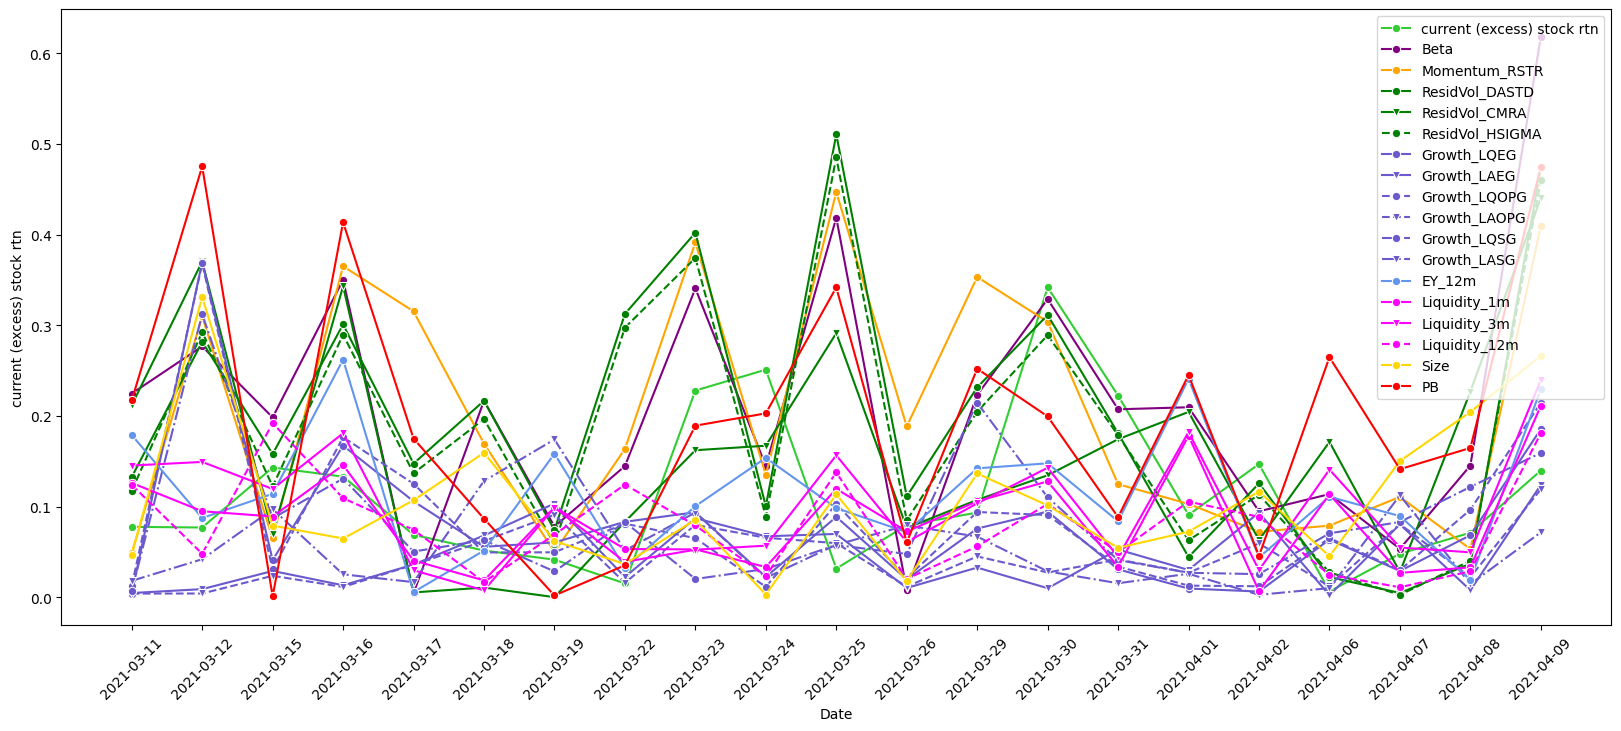

In [58]:
generate_RankIC_plot(first_cycle_rankIC)

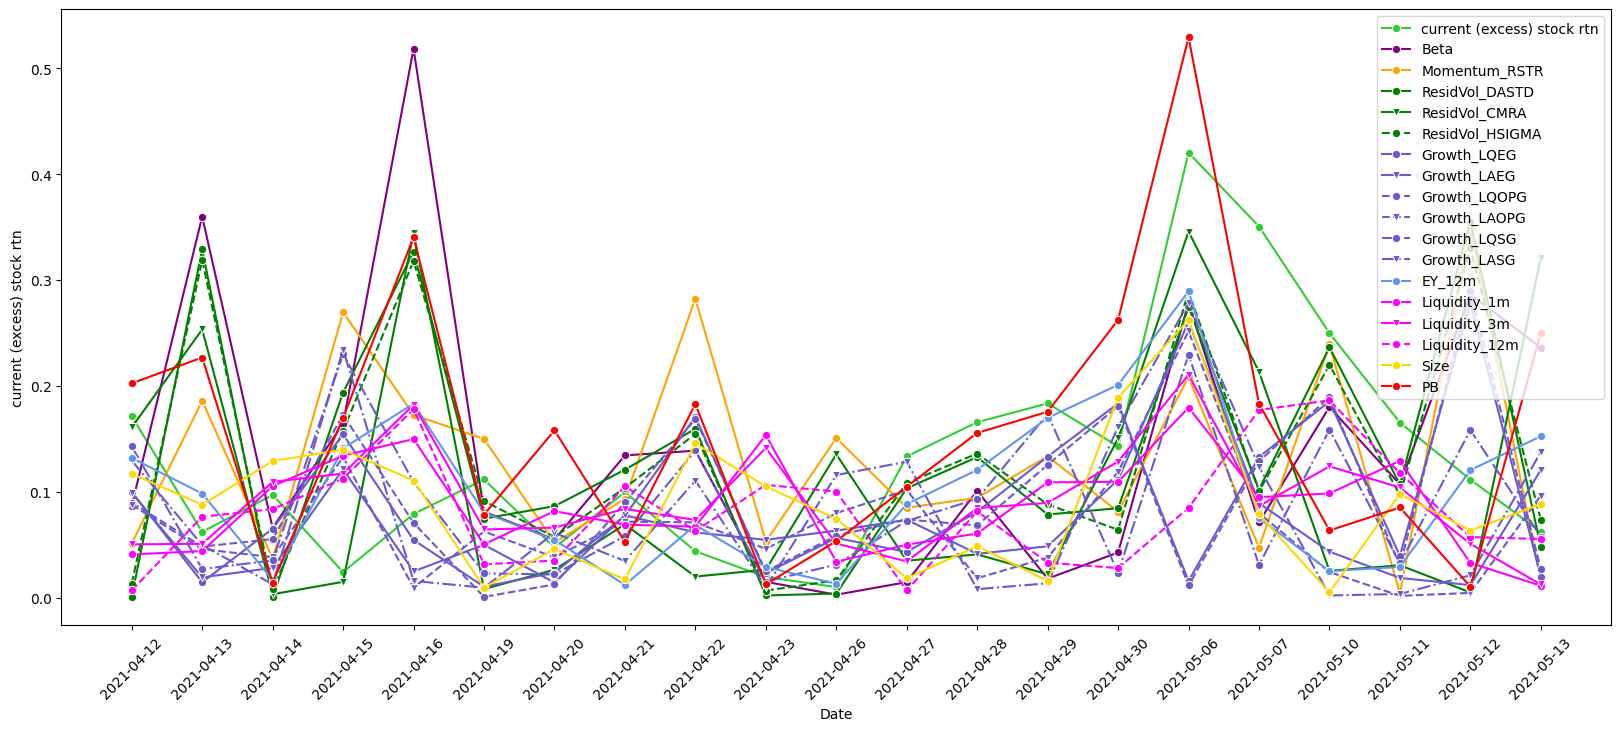

In [59]:
generate_RankIC_plot(second_cycle_rankIC)

# Generate Panel Data

In [60]:
def get_AllPanelData(start_date='2021-03-03'):
    '''
    To generate panel data beyond a certain start date.
    Note: default is 2021-03-03 because our factor estimation requires start date to be 2021-03-03 the earliest
    '''
    date_list = csi500_turnover[csi500_turnover['Date']>=start_date].iloc[:-1,:]['Date']
    date_list = date_list.apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

    cols = ['Date','next (excess) stock rtn', 'current (excess) stock rtn', 'current (excess) universe rtn', 'Beta', 'Momentum_RSTR', 'ResidVol_DASTD', 'ResidVol_CMRA',
            'ResidVol_HSIGMA', 'Growth_LQEG', 'Growth_LAEG', 'Growth_LQOPG', 'Growth_LAOPG','Growth_LQSG', 'Growth_LASG', 'EY_12m',
            'Liquidity_1m','Liquidity_3m','Liquidity_12m','Size','PB']

    panel_data_all = pd.DataFrame(columns=cols)

    for d in date_list:
        meta_d = meta_loader(d)
        meta_d.insert(1,'Date',d)
        panel_data_all = pd.concat([panel_data_all,meta_d])

    panel_data_all.insert(0,'Ticker',panel_data_all.index.tolist())
    panel_data_all = panel_data_all.sort_values(by=['Ticker','Date'],ascending=True).reset_index(drop=True)

    return panel_data_all

In [ ]:
%%time
panel_data_all = get_AllPanelData()
panel_data_all.to_csv('Data/panel_data_all.csv',sep=',',index=True,header=True)

# Panel Regression

In [61]:
panel_data_all=pd.read_csv('Data/panel_data_all.csv',index_col=0)
panel_data_all

,Ticker,Date,next (excess) stock rtn,current (excess) stock rtn,current (excess) universe rtn,Beta,Momentum_RSTR,ResidVol_DASTD,ResidVol_CMRA,ResidVol_HSIGMA,...,Growth_LQOPG,Growth_LAOPG,Growth_LQSG,Growth_LASG,EY_12m,Liquidity_1m,Liquidity_3m,Liquidity_12m,Size,PB
0,000009.SZ,2021-03-03,-0.036329,0.013621,0.014041,1.336105,0.068341,0.012662,0.435908,0.012661,...,0.249695,0.000000,-0.205005,0.000000,0.038787,-1.190922,-0.817397,-0.501725,23.928338,3.5622
1,000009.SZ,2021-03-04,-0.000093,-0.036329,-0.019109,1.354118,0.063846,0.012672,0.354082,0.012538,...,0.249695,0.000000,-0.205005,0.000000,0.040218,-1.190922,-0.817397,-0.501725,23.892126,3.4355
2,000009.SZ,2021-03-05,-0.028662,-0.000093,0.000142,1.354129,0.041524,0.012465,0.328649,0.012401,...,0.249695,0.000000,-0.205005,0.000000,0.040218,-1.190922,-0.817397,-0.501725,23.892126,3.4355
3,000009.SZ,2021-03-08,-0.014733,-0.028662,-0.023294,1.352260,0.030652,0.012398,0.303457,0.012267,...,0.249695,0.000000,-0.205005,0.000000,0.041385,-1.190922,-0.817397,-0.501725,23.863521,3.3387
4,000009.SZ,2021-03-09,0.010068,-0.014733,-0.024125,1.325328,0.073334,0.012233,0.406248,0.012191,...,0.249695,0.000000,-0.205005,0.000000,0.041994,-1.190922,-0.817397,-0.501725,23.848906,3.2902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223495,689009.SH,2022-12-23,-0.002544,0.029094,-0.002816,0.927744,-0.418391,0.010273,1.742542,0.012817,...,-0.051803,2.514912,0.059656,0.523646,0.017962,-2.106435,-1.982479,-2.061747,23.860964,4.8179
223496,689009.SH,2022-12-26,0.016494,-0.002544,0.013702,0.912489,-0.427605,0.010105,1.837798,0.012705,...,-0.051803,2.514912,0.059656,0.523646,0.018007,-2.106435,-1.982479,-2.061747,23.858486,4.8059
223497,689009.SH,2022-12-27,-0.019490,0.016494,0.007120,0.920489,-0.421056,0.009998,1.820840,0.012587,...,-0.051803,2.514912,0.059656,0.523646,0.017710,-2.106435,-1.982479,-2.061747,23.875092,4.8864
223498,689009.SH,2022-12-28,-0.041984,-0.019490,-0.004103,0.924380,-0.390546,0.009906,2.075420,0.012477,...,-0.051803,2.514912,0.059656,0.523646,0.018057,-2.106435,-1.982479,-2.061747,23.855692,4.7925


In [63]:
date_num = panel_data_all[(panel_data_all['Date']>='2021-03-11') & (panel_data_all['Date']<='2022-12-29')].drop_duplicates(subset=['Date'], keep='first')
date_list = date_num["Date"]
#date_list=date_list.apply(lambda x: x.strftime('%Y-%m-%d'))
date_list=np.array(date_list)
date_list=date_list.reshape((21,21))
print(date_list[0])
print(date_list[1])

date_num_2 = panel_data_all[(panel_data_all['Date']>='2021-03-10') & (panel_data_all['Date']<='2022-12-28')].drop_duplicates(subset=['Date'], keep='first')
date_list_2 = date_num_2["Date"]
#date_list=date_list.apply(lambda x: x.strftime('%Y-%m-%d'))
date_list_2=np.array(date_list_2)
date_list_2=date_list_2.reshape((21,21))

['2021-03-11' '2021-03-12' '2021-03-15' '2021-03-16' '2021-03-17'
 '2021-03-18' '2021-03-19' '2021-03-22' '2021-03-23' '2021-03-24'
 '2021-03-25' '2021-03-26' '2021-03-29' '2021-03-30' '2021-03-31'
 '2021-04-01' '2021-04-02' '2021-04-06' '2021-04-07' '2021-04-08'
 '2021-04-09']
['2021-04-12' '2021-04-13' '2021-04-14' '2021-04-15' '2021-04-16'
 '2021-04-19' '2021-04-20' '2021-04-21' '2021-04-22' '2021-04-23'
 '2021-04-26' '2021-04-27' '2021-04-28' '2021-04-29' '2021-04-30'
 '2021-05-06' '2021-05-07' '2021-05-10' '2021-05-11' '2021-05-12'
 '2021-05-13']


In [64]:
panel_data_all = panel_data_all[panel_data_all['Date']>='2021-03-11']
panel_data_all

,Ticker,Date,next (excess) stock rtn,current (excess) stock rtn,current (excess) universe rtn,Beta,Momentum_RSTR,ResidVol_DASTD,ResidVol_CMRA,ResidVol_HSIGMA,...,Growth_LQOPG,Growth_LAOPG,Growth_LQSG,Growth_LASG,EY_12m,Liquidity_1m,Liquidity_3m,Liquidity_12m,Size,PB
6,000009.SZ,2021-03-11,-0.023480,0.018808,0.024624,1.289445,0.169339,0.011907,0.298964,0.012015,...,0.249695,0.000000,-0.205005,0.000000,0.040793,-1.190922,-0.817397,-0.501725,23.877925,3.3871
7,000009.SZ,2021-03-12,0.005556,-0.023480,0.001268,1.278612,0.177560,0.011808,0.306868,0.011982,...,0.249695,0.000000,-0.205005,0.000000,0.041757,-1.190922,-0.817397,-0.501725,23.854552,3.3089
8,000009.SZ,2021-03-15,0.018813,0.005556,-0.007886,1.272861,0.196037,0.011619,0.358825,0.011889,...,0.249695,0.000000,-0.205005,0.000000,0.041524,-1.190922,-0.817397,-0.501725,23.860167,3.3275
9,000009.SZ,2021-03-16,-0.015611,0.018813,0.003411,1.276235,0.193520,0.011488,0.376052,0.011788,...,0.249695,0.000000,-0.205005,0.000000,0.040748,-1.190922,-0.817397,-0.501725,23.879025,3.3908
10,000009.SZ,2021-03-17,-0.028378,-0.015611,0.004742,1.268327,0.184429,0.011345,0.356232,0.011748,...,0.249695,0.000000,-0.205005,0.000000,0.041385,-1.190922,-0.817397,-0.501725,23.863521,3.3387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223495,689009.SH,2022-12-23,-0.002544,0.029094,-0.002816,0.927744,-0.418391,0.010273,1.742542,0.012817,...,-0.051803,2.514912,0.059656,0.523646,0.017962,-2.106435,-1.982479,-2.061747,23.860964,4.8179
223496,689009.SH,2022-12-26,0.016494,-0.002544,0.013702,0.912489,-0.427605,0.010105,1.837798,0.012705,...,-0.051803,2.514912,0.059656,0.523646,0.018007,-2.106435,-1.982479,-2.061747,23.858486,4.8059
223497,689009.SH,2022-12-27,-0.019490,0.016494,0.007120,0.920489,-0.421056,0.009998,1.820840,0.012587,...,-0.051803,2.514912,0.059656,0.523646,0.017710,-2.106435,-1.982479,-2.061747,23.875092,4.8864
223498,689009.SH,2022-12-28,-0.041984,-0.019490,-0.004103,0.924380,-0.390546,0.009906,2.075420,0.012477,...,-0.051803,2.514912,0.059656,0.523646,0.018057,-2.106435,-1.982479,-2.061747,23.855692,4.7925


In [65]:
from statsmodels.datasets import grunfeld
from linearmodels.panel import PanelOLS
import statsmodels.formula.api as smf
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.5 MB/s eta 0:00:00


In [66]:
group = 21
inputs = ['current (excess) stock rtn', 'current (excess) universe rtn', 'Beta', 'Momentum_RSTR', 'ResidVol_DASTD', 'ResidVol_CMRA',
          'ResidVol_HSIGMA', 'Growth_LQEG', 'Growth_LAEG', 'Growth_LQOPG', 'Growth_LAOPG','Growth_LQSG', 'Growth_LASG', 'EY_12m',
          'Liquidity_1m','Liquidity_3m','Liquidity_12m','Size','PB']
outputs = 'next (excess) stock rtn'

## Data in one period

In [67]:
def panelregression_period (panel_data,order,period,list):
  panel_date_list = list[order,:]
  panel_date = '|'.join(panel_date_list)

  panel_data_order = panel_data[panel_data['Date'].str.contains(panel_date)]

  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

  scaler=StandardScaler()
  panel_data_order_scaled = panel_data_order
  scaled=scaler.fit_transform(panel_data_order_scaled.loc[:,'current (excess) stock rtn':'PB'])
  panel_df_order_scaled = pd.DataFrame(scaled,columns=inputs)
  panel_df_order_scaled['Ticker']=panel_data_order['Ticker'].values
  panel_df_order_scaled['Date']=panel_data_order['Date'].values
  panel_df_order_scaled['next (excess) stock rtn']=panel_data_order['next (excess) stock rtn'].values
  panel_df_order_scaled = panel_df_order_scaled.set_index(['Ticker', 'Date'],drop=False)

  return panel_df_order_scaled

## regression for factor selection

In [68]:
def panelregression_first(data,left,right):
  res_fe = PanelOLS(data[left], data[right], time_effects=True, entity_effects=True, drop_absorbed=True) #11家公司创建10个虚拟变量
  results_fe = res_fe.fit(cov_type='clustered',cluster_entity=True)
  print(results_fe.params)
  print(results_fe.tstats)
  tstats=pd.DataFrame(results_fe.tstats)
  tstats['params_beta']=results_fe.params
  tstats=tstats[tstats['tstat'].abs()>1.96]
  tstats['params']=tstats.index
  return tstats

## regression for prediction

In [69]:
def panelregression_final(data,left,params):
  right=np.array(params['params'])
  para=np.array(params['params_beta'])
  res_fe = PanelOLS(data[left], data[right], drop_absorbed=True) #11家公司创建10个虚拟变量
  results_fe = res_fe.fit(cov_type='clustered',cluster_entity=True)
  print(results_fe.params)
  results_predict = results_fe.predict(exog=data[right])
  return results_predict

In [71]:
for i in range(21):
  if i<=19:
    test_now=panelregression_period(panel_data_all,i,21,date_list)
    test_for_predict=panelregression_period(panel_data_all,i+1,21,date_list_2)

    # Factor selection of model
    test_i=panelregression_first(test_now,outputs,inputs)

    #apply model to the next period
    predict_rtn=panelregression_final(test_for_predict,outputs,test_i)

    predict_rtn=predict_rtn.unstack(level=0)
    if i==0:
      backtest = predict_rtn
    else:
      backtest = pd.concat([backtest,predict_rtn])
backtest_num = panel_data_all[(panel_data_all['Date']>='2021-04-10') & (panel_data_all['Date']<='2022-12-29')].drop_duplicates(subset=['Date'], keep='first')
backtest['Date']= backtest_num["Date"].values
backtest=backtest.set_index('Date',drop=True)
backtest

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000806
Beta                          0.006576
Momentum_RSTR                -0.001420
ResidVol_DASTD                0.019621
ResidVol_CMRA                -0.000728
ResidVol_HSIGMA              -0.025325
Growth_LQEG                  -0.355593
Growth_LAEG                  -0.000635
Growth_LAOPG                 -0.000491
Growth_LASG                  -0.000098
EY_12m                        0.005561
Size                         -0.948348
PB                           -0.001781
Name: parameter, dtype: float64
current (excess) stock rtn     2.076873
Beta                           1.134123
Momentum_RSTR                 -0.881378
ResidVol_DASTD                 1.776547
ResidVol_CMRA                 -1.159748
ResidVol_HSIGMA               -1.730529
Growth_LQEG                   -4.965539
Growth_LAEG                   -1.081861
Growth_LAOPG                  -1.421578
Growth_LASG                   -0.164987
EY_12m                         1.097451
Size                 

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.000536
Beta                         -0.053705
Momentum_RSTR                 0.000098
ResidVol_DASTD               -0.014223
ResidVol_CMRA                 0.002113
ResidVol_HSIGMA               0.016379
Growth_LQEG                   0.000976
Growth_LAEG                   0.000336
Growth_LQOPG                  0.000016
Growth_LAOPG                 -0.003235
Growth_LQSG                   0.000602
Growth_LASG                  -0.003552
EY_12m                        0.001718
Size                          0.021495
PB                           -0.034786
Name: parameter, dtype: float64
current (excess) stock rtn   -1.653940
Beta                         -4.768701
Momentum_RSTR                 0.052287
ResidVol_DASTD               -1.144956
ResidVol_CMRA                 2.651635
ResidVol_HSIGMA               0.994418
Growth_LQEG                   1.745650
Growth_LAEG                   0.452356
Growth_LQOPG                  0.026846
Growth_LAOPG                 -0.

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.000789
Beta                         -0.012026
Momentum_RSTR                 0.005633
ResidVol_DASTD                0.048389
ResidVol_CMRA                 0.000478
ResidVol_HSIGMA              -0.065846
Growth_LQEG                  -0.472100
Growth_LQOPG                  0.287842
Growth_LQSG                   0.225258
EY_12m                        0.030364
Size                          0.019838
PB                           -0.047282
Name: parameter, dtype: float64
current (excess) stock rtn   -1.941572
Beta                         -1.040224
Momentum_RSTR                 3.674472
ResidVol_DASTD                2.250442
ResidVol_CMRA                 0.596092
ResidVol_HSIGMA              -2.441780
Growth_LQEG                  -1.201261
Growth_LQOPG                  0.939483
Growth_LQSG                   1.605380
EY_12m                        2.276959
Size                          2.349592
PB                           -4.726955
Name: tstat, dtype: float64
Mome

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000512
Beta                          0.007303
Momentum_RSTR                -0.000421
ResidVol_DASTD                0.003428
ResidVol_CMRA                 0.003482
ResidVol_HSIGMA              -0.020795
Growth_LQEG                   0.069076
Growth_LQOPG                 -0.071823
Growth_LQSG                  -0.000390
EY_12m                        0.058440
Size                         -0.012627
PB                           -0.001930
Name: parameter, dtype: float64
current (excess) stock rtn    1.043469
Beta                          1.461531
Momentum_RSTR                -0.218414
ResidVol_DASTD                0.232274
ResidVol_CMRA                 2.660341
ResidVol_HSIGMA              -1.419825
Growth_LQEG                   4.209834
Growth_LQOPG                 -5.050429
Growth_LQSG                  -0.095804
EY_12m                        4.889739
Size                         -1.194726
PB                           -0.647856
Name: tstat, dtype: float64
Resi

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000692
Beta                          0.013702
Momentum_RSTR                -0.001288
ResidVol_DASTD               -0.002608
ResidVol_CMRA                -0.000101
ResidVol_HSIGMA              -0.003330
Growth_LQEG                   0.006684
Growth_LQOPG                 -0.001378
Growth_LQSG                   0.000133
EY_12m                        0.064701
Size                          0.003021
PB                           -0.061698
Name: parameter, dtype: float64
current (excess) stock rtn    1.050817
Beta                          3.255171
Momentum_RSTR                -0.800885
ResidVol_DASTD               -0.162113
ResidVol_CMRA                -0.171148
ResidVol_HSIGMA              -0.218992
Growth_LQEG                   0.927022
Growth_LQOPG                 -5.190315
Growth_LQSG                   0.033597
EY_12m                        4.566107
Size                          0.285664
PB                           -2.928237
Name: tstat, dtype: float64
Beta

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000366
Beta                          0.018157
Momentum_RSTR                -0.001218
ResidVol_DASTD                0.010709
ResidVol_CMRA                -0.000615
ResidVol_HSIGMA              -0.023284
Growth_LQEG                  -0.001037
Growth_LQOPG                  0.002369
Growth_LQSG                  -0.000013
EY_12m                        0.006089
Size                         -0.470240
PB                           -0.003403
Name: parameter, dtype: float64
current (excess) stock rtn     0.823427
Beta                           4.003629
Momentum_RSTR                 -0.692443
ResidVol_DASTD                 0.490078
ResidVol_CMRA                 -1.647950
ResidVol_HSIGMA               -0.769904
Growth_LQEG                   -0.979792
Growth_LQOPG                   0.775590
Growth_LQSG                   -0.178751
EY_12m                         2.423482
Size                         -13.462635
PB                            -0.877239
Name: tstat, dtype: 

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.000673
Beta                          0.002584
Momentum_RSTR                -0.004540
ResidVol_DASTD                0.022687
ResidVol_CMRA                 0.001165
ResidVol_HSIGMA              -0.058256
Growth_LQEG                  -0.048192
Growth_LQOPG                  0.268729
Growth_LQSG                  -6.361451
EY_12m                        0.050731
Size                          0.011422
PB                           -0.000085
Name: parameter, dtype: float64
current (excess) stock rtn   -1.497466
Beta                          0.959553
Momentum_RSTR                -1.744300
ResidVol_DASTD                1.676067
ResidVol_CMRA                 0.865526
ResidVol_HSIGMA              -2.931743
Growth_LQEG                  -2.483013
Growth_LQOPG                  3.160084
Growth_LQSG                  -1.781807
EY_12m                        7.001213
Size                          1.271532
PB                           -0.507277
Name: tstat, dtype: float64
Resi

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.001556
Beta                          0.027906
Momentum_RSTR                -0.001486
ResidVol_DASTD               -0.013300
ResidVol_CMRA                 0.001573
ResidVol_HSIGMA               0.009463
Growth_LQEG                   0.000666
Growth_LQOPG                 -0.000299
Growth_LQSG                   0.008646
EY_12m                        0.004825
Size                          0.004510
PB                           -0.006396
Name: parameter, dtype: float64
current (excess) stock rtn   -3.613636
Beta                          5.459219
Momentum_RSTR                -0.738928
ResidVol_DASTD               -0.921013
ResidVol_CMRA                 1.700581
ResidVol_HSIGMA               0.478543
Growth_LQEG                   0.945443
Growth_LQOPG                 -1.100767
Growth_LQSG                   1.087011
EY_12m                        1.477239
Size                          0.679395
PB                           -0.763404
Name: tstat, dtype: float64
curr

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.001474
Beta                         -0.009436
Momentum_RSTR                -0.000083
ResidVol_DASTD               -0.002066
ResidVol_CMRA                 0.001318
ResidVol_HSIGMA               0.008985
Growth_LQEG                   0.005792
Growth_LQOPG                 -0.078499
Growth_LQSG                   0.050919
EY_12m                       -0.015588
Size                         -0.613063
PB                           -0.004385
Name: parameter, dtype: float64
current (excess) stock rtn    3.802299
Beta                         -0.962622
Momentum_RSTR                -0.037550
ResidVol_DASTD               -0.145118
ResidVol_CMRA                 2.741737
ResidVol_HSIGMA               0.433899
Growth_LQEG                   3.470527
Growth_LQOPG                 -5.964757
Growth_LQSG                   7.298669
EY_12m                       -0.928734
Size                         -9.845253
PB                           -0.514308
Name: tstat, dtype: float64
curr

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000043
Beta                          0.007362
Momentum_RSTR                 0.007059
ResidVol_DASTD                0.000225
ResidVol_CMRA                 0.002322
ResidVol_HSIGMA              -0.028332
Growth_LQEG                  -0.003093
Growth_LAEG                  -0.022448
Growth_LQOPG                  0.158152
Growth_LAOPG                  0.075029
Growth_LQSG                   0.192984
Growth_LASG                  -0.001648
EY_12m                        0.060474
Size                          0.002185
PB                           -0.000059
Name: parameter, dtype: float64
current (excess) stock rtn    0.089428
Beta                          1.582057
Momentum_RSTR                 2.495657
ResidVol_DASTD                0.018410
ResidVol_CMRA                 2.061204
ResidVol_HSIGMA              -1.653165
Growth_LQEG                  -0.480104
Growth_LAEG                  -6.292078
Growth_LQOPG                  0.754633
Growth_LAOPG                  6.

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn      0.001946
Beta                            0.000780
Momentum_RSTR                  -0.003984
ResidVol_DASTD                  0.018016
ResidVol_CMRA                  -0.000816
ResidVol_HSIGMA                -0.014573
Growth_LQEG                   -72.747241
Growth_LAEG                     1.952818
Growth_LQOPG                  366.290890
Growth_LAOPG                   23.782660
EY_12m                         -0.012280
Size                           -0.391536
PB                              0.000065
Name: parameter, dtype: float64
current (excess) stock rtn     5.350816
Beta                           0.260327
Momentum_RSTR                 -1.946594
ResidVol_DASTD                 2.873256
ResidVol_CMRA                 -2.266802
ResidVol_HSIGMA               -1.178280
Growth_LQEG                   -8.654710
Growth_LAEG                    8.794055
Growth_LQOPG                   8.691368
Growth_LAOPG                   8.805094
EY_12m                        -0.51

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000688
Beta                          0.001382
Momentum_RSTR                -0.002940
ResidVol_DASTD                0.006681
ResidVol_CMRA                 0.000504
ResidVol_HSIGMA              -0.017348
Growth_LAEG                   0.000449
Growth_LAOPG                  0.005449
Growth_LASG                  -0.034799
EY_12m                        0.019820
Size                          0.017289
PB                           -0.045969
Name: parameter, dtype: float64
current (excess) stock rtn    1.190214
Beta                          0.742454
Momentum_RSTR                -1.106212
ResidVol_DASTD                1.629981
ResidVol_CMRA                 0.960293
ResidVol_HSIGMA              -3.543957
Growth_LAEG                   0.873311
Growth_LAOPG                  1.298519
Growth_LASG                  -1.492482
EY_12m                        3.456524
Size                          1.670249
PB                           -2.306062
Name: tstat, dtype: float64
Resi

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.001300
Beta                          0.006027
Momentum_RSTR                 0.004608
ResidVol_DASTD               -0.010784
ResidVol_CMRA                 0.000793
ResidVol_HSIGMA              -0.000757
Growth_LQEG                   0.002727
Growth_LAEG                  -0.013781
Growth_LQOPG                  0.044758
Growth_LAOPG                 -0.000367
Growth_LQSG                  -0.106178
Growth_LASG                   0.000460
EY_12m                        0.007108
Size                          0.002392
PB                           -0.002144
Name: parameter, dtype: float64
current (excess) stock rtn   -3.540671
Beta                          1.994619
Momentum_RSTR                 2.749451
ResidVol_DASTD               -2.083628
ResidVol_CMRA                 2.085401
ResidVol_HSIGMA              -0.118417
Growth_LQEG                   0.909113
Growth_LAEG                  -1.667611
Growth_LQOPG                  1.320638
Growth_LAOPG                 -1.

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.001688
Beta                         -0.004016
Momentum_RSTR                -0.005202
ResidVol_DASTD               -0.010106
ResidVol_CMRA                 0.000443
ResidVol_HSIGMA               0.019195
Growth_LQEG                  -0.001490
Growth_LAEG                  -0.002081
Growth_LQOPG                 -0.000140
Growth_LAOPG                 -0.000461
Growth_LQSG                   0.000003
Growth_LASG                  -0.000745
EY_12m                       -0.002002
Size                         -0.224279
PB                           -0.006357
Name: parameter, dtype: float64
current (excess) stock rtn     4.299503
Beta                          -0.639691
Momentum_RSTR                 -2.192009
ResidVol_DASTD                -1.238739
ResidVol_CMRA                  1.269511
ResidVol_HSIGMA                2.026857
Growth_LQEG                   -2.740647
Growth_LAEG                   -0.205360
Growth_LQOPG                  -0.735964
Growth_LAOPG           

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.001370
Beta                         -0.011388
Momentum_RSTR                 0.005271
ResidVol_DASTD                0.007481
ResidVol_CMRA                 0.000513
ResidVol_HSIGMA              -0.013791
EY_12m                       -0.007739
Size                         -0.183022
PB                            0.001609
Name: parameter, dtype: float64
current (excess) stock rtn     3.986733
Beta                          -1.518685
Momentum_RSTR                  2.631757
ResidVol_DASTD                 0.855453
ResidVol_CMRA                  0.763228
ResidVol_HSIGMA               -1.282969
EY_12m                        -0.581176
Size                         -10.486070
PB                             0.221031
Name: tstat, dtype: float64
current (excess) stock rtn   -0.001279
Momentum_RSTR                 0.001203
Size                         -0.000351
Name: parameter, dtype: float64


C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000969
Beta                          0.000453
Momentum_RSTR                -0.002495
ResidVol_DASTD               -0.010451
ResidVol_CMRA                 0.000323
ResidVol_HSIGMA               0.013757
Growth_LQEG                   2.245528
Growth_LQOPG                 -0.833120
Growth_LQSG                  -0.117846
EY_12m                       -0.005461
Size                         -0.179058
PB                            0.001480
Name: parameter, dtype: float64
current (excess) stock rtn     2.960104
Beta                           0.069704
Momentum_RSTR                 -1.304301
ResidVol_DASTD                -1.202226
ResidVol_CMRA                  0.439304
ResidVol_HSIGMA                1.434993
Growth_LQEG                    2.244023
Growth_LQOPG                  -1.614962
Growth_LQSG                   -6.422699
EY_12m                        -0.675486
Size                         -13.286655
PB                             0.721524
Name: tstat, dtype: 

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.000935
Beta                         -0.002990
Momentum_RSTR                 0.002584
ResidVol_DASTD                0.013978
ResidVol_CMRA                -0.000727
ResidVol_HSIGMA              -0.025144
Growth_LQEG                   0.000355
Growth_LQOPG                 -0.003873
Growth_LQSG                   0.017260
EY_12m                        0.001670
Size                         -0.165382
PB                            0.020277
Name: parameter, dtype: float64
current (excess) stock rtn     2.276273
Beta                          -0.527820
Momentum_RSTR                  1.087849
ResidVol_DASTD                 1.585942
ResidVol_CMRA                 -1.843858
ResidVol_HSIGMA               -2.318281
Growth_LQEG                    0.073112
Growth_LQOPG                  -1.278971
Growth_LQSG                    1.977284
EY_12m                         0.288579
Size                         -10.769925
PB                             8.482721
Name: tstat, dtype: 

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.000122
Beta                          0.020934
Momentum_RSTR                -0.007615
ResidVol_DASTD                0.001034
ResidVol_CMRA                 0.000086
ResidVol_HSIGMA              -0.007937
Growth_LQEG                   0.039674
Growth_LQOPG                  0.008095
Growth_LQSG                  -0.020744
EY_12m                        0.004372
Size                         -0.117541
PB                            0.016257
Name: parameter, dtype: float64
current (excess) stock rtn   -0.247947
Beta                          3.185636
Momentum_RSTR                -4.950832
ResidVol_DASTD                0.120684
ResidVol_CMRA                 0.212210
ResidVol_HSIGMA              -0.689406
Growth_LQEG                   1.618001
Growth_LQOPG                  1.664875
Growth_LQSG                  -1.590762
EY_12m                        1.427708
Size                         -3.859322
PB                            0.978649
Name: tstat, dtype: float64
Beta

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn    0.002153
Beta                          0.002083
Momentum_RSTR                -0.004079
ResidVol_DASTD                0.016469
ResidVol_CMRA                 0.001236
ResidVol_HSIGMA              -0.019942
Growth_LQEG                   0.001022
Growth_LQOPG                 -0.000714
Growth_LQSG                   0.001590
EY_12m                        0.000931
Size                         -0.132577
PB                           -0.000462
Name: parameter, dtype: float64
current (excess) stock rtn    4.266333
Beta                          0.262349
Momentum_RSTR                -1.716759
ResidVol_DASTD                1.431501
ResidVol_CMRA                 1.535930
ResidVol_HSIGMA              -1.329112
Growth_LQEG                   3.109174
Growth_LQOPG                 -3.070475
Growth_LQSG                   9.847419
EY_12m                        0.434134
Size                         -9.461705
PB                           -1.033072
Name: tstat, dtype: float64
curr

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\1957507088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data_order['Date'] = panel_data_order['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_19464\2063006298.py:3: Ab

current (excess) stock rtn   -0.000711
Beta                         -0.023126
Momentum_RSTR                -0.002052
ResidVol_DASTD                0.016984
ResidVol_CMRA                -0.000366
ResidVol_HSIGMA              -0.018360
Growth_LQEG                   0.167730
EY_12m                       -0.005583
Size                         -0.177008
PB                           -0.006084
Name: parameter, dtype: float64
current (excess) stock rtn    -1.737574
Beta                          -3.996791
Momentum_RSTR                 -1.669562
ResidVol_DASTD                 1.650098
ResidVol_CMRA                 -0.932629
ResidVol_HSIGMA               -1.414065
Growth_LQEG                    2.769788
EY_12m                        -1.575757
Size                         -14.960012
PB                            -3.240346
Name: tstat, dtype: float64
Beta          -0.000387
Growth_LQEG   -0.000270
Size          -0.001031
PB             0.000198
Name: parameter, dtype: float64


predictions                                                    \
Ticker       000009.SZ 000012.SZ 000021.SZ 000027.SZ 000031.SZ 000039.SZ   
Date                                                                       
2021-04-12   -0.000232 -0.000126 -0.000521  0.000577 -0.000323  0.001389   
2021-04-13   -0.000765 -0.000800 -0.000326  0.001410  0.000133 -0.001255   
2021-04-14    0.000591 -0.000341 -0.000064 -0.002806 -0.000323  0.000100   
2021-04-15    0.000441 -0.000122 -0.000168 -0.000643 -0.000192 -0.000024   
2021-04-16   -0.000156  0.000662 -0.000914 -0.001263 -0.000257 -0.000854   
...                ...       ...       ...       ...       ...       ...   
2022-12-23   -0.001124 -0.000060  0.000027 -0.000214  0.000299 -0.000316   
2022-12-26   -0.001115 -0.000054  0.000027 -0.000212  0.000300 -0.000311   
2022-12-27   -0.001109 -0.000085 -0.000003 -0.000246  0.000323 -0.000298   
2022-12-28   -0.001049 -0.000077 -0.000007 -0.000289  0.000315 -0.000318   
2022-12-29   -0.001039 -0.000072  0.000004 -0.000295  0.000305 -0.000330   

                                                    ...                      \
Ticker     000050.SZ 000060.SZ 000066.SZ 000089.SZ  ... 688536.SH 688538.SH   
Date                                                ...                       
2021-04-12 -0.000237 -0.000364 -0.002585 -0.000293  ...  0.000007  0.002006   
2021-04-13 -0.000488 -0.000527 -0.001838 -0.000559  ... -0.000382  0.002006   
2021-04-14 -0.000473 -0.000367 -0.000623 -0.000264  ... -0.000628  0.002006   
2021-04-15  0.000342  0.000015  0.000217 -0.000652  ...  0.000346  0.002007   
2021-04-16 -0.000470  0.000386 -0.000442  0.000098  ... -0.000020  0.002007   
...              ...       ...       ...       ...  ...       ...       ...   
2022-12-23 -0.000086  0.000201 -0.000504  0.000788  ...  0.000351  0.000008   
2022-12-26 -0.000090  0.000199 -0.000504  0.000796  ...  0.000366  0.000005   
2022-12-27 -0.000077  0.000223 -0.000524  0.000756  ...  0.000306 -0.000010   
2022-12-28 -0.000074  0.000207 -0.000515  0.000772  ...  0.000298  0.000008   
2022-12-29 -0.000061  0.000206 -0.000501  0.000773  ...  0.000300  0.000011   

                                                                        \
Ticker     688567.SH 688690.SH 688772.SH 688777.SH 688778.SH 688779.SH   
Date                                                                     
2021-04-12 -0.000528  0.001996  0.001996  0.000281  0.000188  0.001996   
2021-04-13 -0.001736  0.001996  0.001996 -0.001053  0.000188  0.001996   
2021-04-14 -0.000792  0.001995  0.001995 -0.000381  0.000187  0.001995   
2021-04-15  0.000208  0.001996  0.001996  0.000275  0.000189  0.001996   
2021-04-16 -0.000671  0.001996  0.001996 -0.000240  0.000188  0.001996   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.000742  0.001077 -0.000708  0.000034 -0.000725 -0.000620   
2022-12-26 -0.000736  0.001079 -0.000681  0.000033 -0.000725 -0.000611   
2022-12-27 -0.000764  0.001067 -0.000771 -0.000017 -0.000811 -0.000636   
2022-12-28 -0.000752  0.001100 -0.000768 -0.000053 -0.000810 -0.000644   
2022-12-29 -0.000747  0.001099 -0.000751 -0.000050 -0.000800 -0.000630   

                                
Ticker     688819.SH 689009.SH  
Date                            
2021-04-12 -0.000786 -0.001798  
2021-04-13 -0.001488 -0.001668  
2021-04-14 -0.000306 -0.000064  
2021-04-15  0.000088 -0.000180  
2021-04-16 -0.000614 -0.001322  
...              ...       ...  
2022-12-23 -0.000701  0.000201  
2022-12-26 -0.000696  0.000185  
2022-12-27 -0.000789  0.000208  
2022-12-28 -0.000809  0.000183  
2022-12-29 -0.000807  0.000194  

[420 rows x 500 columns]

In [72]:
outputpath='Data/backtest.csv'
backtest.to_csv(outputpath,sep=',',index=True,header=True)

# backtest

## predict rtn

In [70]:
path='Data/backtest.csv'
backtest_predict_data=pd.read_csv(path,header=1,index_col=0)

In [71]:
backtest_predict_data=backtest_predict_data.drop(index='Date')
backtest_predict_data

,000009.SZ,000012.SZ,000021.SZ,000027.SZ,000031.SZ,000039.SZ,000050.SZ,000060.SZ,000066.SZ,000089.SZ,...,688536.SH,688538.SH,688567.SH,688690.SH,688772.SH,688777.SH,688778.SH,688779.SH,688819.SH,689009.SH
Ticker,,,,,,,,,,,,,,,,,,,,,
2021-04-12,-0.000232,-0.000126,-0.000521,0.000577,-0.000323,0.001389,-0.000237,-0.000364,-0.002585,-0.000293,...,0.000007,0.002006,-0.000528,0.001996,0.001996,0.000281,0.000188,0.001996,-0.000786,-0.001798
2021-04-13,-0.000765,-0.000800,-0.000326,0.001410,0.000133,-0.001255,-0.000488,-0.000527,-0.001838,-0.000559,...,-0.000382,0.002006,-0.001736,0.001996,0.001996,-0.001053,0.000188,0.001996,-0.001488,-0.001668
2021-04-14,0.000591,-0.000341,-0.000064,-0.002806,-0.000323,0.000100,-0.000473,-0.000367,-0.000623,-0.000264,...,-0.000628,0.002006,-0.000792,0.001995,0.001995,-0.000381,0.000187,0.001995,-0.000306,-0.000064
2021-04-15,0.000441,-0.000122,-0.000168,-0.000643,-0.000192,-0.000024,0.000342,0.000015,0.000217,-0.000652,...,0.000346,0.002007,0.000208,0.001996,0.001996,0.000275,0.000189,0.001996,0.000088,-0.000180
2021-04-16,-0.000156,0.000662,-0.000914,-0.001263,-0.000257,-0.000854,-0.000470,0.000386,-0.000442,0.000098,...,-0.000020,0.002007,-0.000671,0.001996,0.001996,-0.000240,0.000188,0.001996,-0.000614,-0.001322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.001124,-0.000060,0.000027,-0.000214,0.000299,-0.000316,-0.000086,0.000201,-0.000504,0.000788,...,0.000351,0.000008,-0.000742,0.001077,-0.000708,0.000034,-0.000725,-0.000620,-0.000701,0.000201
2022-12-26,-0.001115,-0.000054,0.000027,-0.000212,0.000300,-0.000311,-0.000090,0.000199,-0.000504,0.000796,...,0.000366,0.000005,-0.000736,0.001079,-0.000681,0.000033,-0.000725,-0.000611,-0.000696,0.000185
2022-12-27,-0.001109,-0.000085,-0.000003,-0.000246,0.000323,-0.000298,-0.000077,0.000223,-0.000524,0.000756,...,0.000306,-0.000010,-0.000764,0.001067,-0.000771,-0.000017,-0.000811,-0.000636,-0.000789,0.000208


## sign of buy or sell

In [81]:
def backtest_sign_matrix(backtest_predict_data):
  'Use the predicted data to find the sign of buying or selling for each stock'
  backtest_predict_data_array=backtest_predict_data.values
  backtest_predict_sign=[]
  for i in backtest_predict_data_array:
    i = np.sign(i-0.005)
    i[i==-1] = 0
    if len(backtest_predict_sign)==0:
      backtest_predict_sign=i
    else:
      backtest_predict_sign= np.vstack((backtest_predict_sign,i))
  return backtest_predict_sign

In [82]:
backtest_predict_sign = backtest_sign_matrix(backtest_predict_data)

## true rtn

In [73]:
tickers = pd.read_csv("Data/rtn_500.csv").columns[1:].tolist()
csi500_stock_rtn = pd.DataFrame(pd.read_csv("Data/rtn_500.csv").iloc[2:,:].values, columns=['Date']+tickers)
csi500_stock_rtn.iloc[:,1:] = csi500_stock_rtn.iloc[:,1:].apply(lambda col: col.str.strip().str.replace(',',''))
csi500_stock_rtn.iloc[:,1:] = np.log(csi500_stock_rtn.iloc[:,1:].astype(float)/100+1)
csi500_stock_rtn['Date'] = csi500_stock_rtn['Date'].astype(str)
backtest_rtn_data=csi500_stock_rtn[csi500_stock_rtn['Date']>='2021-04-12']
backtest_rtn_data=backtest_rtn_data.set_index('Date',drop=True)

backtest_rtn_data=backtest_rtn_data.drop(backtest_rtn_data.index[[-1]])
backtest_rtn_data=backtest_rtn_data.sort_index(axis=1)

display(backtest_rtn_data)

,000009.SZ,000012.SZ,000021.SZ,000027.SZ,000031.SZ,000039.SZ,000050.SZ,000060.SZ,000066.SZ,000089.SZ,...,688536.SH,688538.SH,688567.SH,688690.SH,688772.SH,688777.SH,688778.SH,688779.SH,688819.SH,689009.SH
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-12,-0.024174,-0.02663,-0.006741,0.062201,0.012837,-0.040218,-0.01134,-0.014847,-0.058909,-0.012813,...,-0.014969,0.0,-0.047765,0.0,0.0,-0.03279,0.0,0.0,-0.051293,-0.052504
2021-04-13,0.029352,-0.00856,0.003635,-0.104261,-0.005115,0.01319,-0.010749,-0.008584,-0.011093,-0.001173,...,-0.024709,0.0,-0.010624,0.0,0.0,-0.006323,0.0,0.0,-0.004734,0.010754
2021-04-14,0.023482,0.0,-0.000518,-0.019163,0.0,0.008303,0.021384,0.006445,0.022066,-0.016569,...,0.013661,0.0,0.028852,0.0,0.0,0.019568,0.0,0.0,0.010789,0.006158
2021-04-15,0.0,0.031032,-0.03001,-0.043712,-0.002567,-0.024515,-0.010634,0.021187,-0.003905,0.013041,...,-0.000755,0.0,-0.005782,0.0,0.0,-0.000718,0.0,0.0,-0.016909,-0.038927
2021-04-16,0.008041,0.051432,-0.01291,-0.001065,0.012771,-0.006071,0.00993,-0.002098,0.001564,0.010545,...,-0.025181,0.0,0.018764,0.0,0.0,0.005491,0.0,0.0,0.011755,0.073507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.012749,-0.008995,0.000947,-0.001741,0.0,-0.002898,0.005711,0.002466,0.000983,-0.010296,...,-0.037156,0.003738,-0.008406,-0.030392,-0.037002,0.002798,0.000394,-0.012679,-0.005206,0.029188
2022-12-26,0.011957,0.02528,0.021527,0.02069,0.0,0.002899,0.003411,0.0,0.017527,0.023019,...,0.035367,0.011132,0.024262,0.012806,0.048867,0.031177,0.047384,0.021263,0.047837,-0.002477
2022-12-27,-0.028941,0.0,0.00646,0.026938,0.007906,0.020057,0.001134,0.01224,-0.000965,-0.00507,...,0.007692,-0.007407,-0.00225,-0.027434,0.002561,0.02881,0.004493,0.009162,0.015904,0.016605


## backtest and result of rt

In [89]:
def backtest_rt(backtest_rtn_data, backtest_predict_sign):
    'Use the history return data and the predict sign matrix to get r_t of the strategy'
    backtest_rtn_matrix=backtest_rtn_data.values.astype('float')
    backtest_rtn_matrix_exp=[]
    for i in backtest_rtn_matrix:
      i = np.exp(i)
      if len(backtest_rtn_matrix_exp)==0:
        backtest_rtn_matrix_exp=i
      else:
        backtest_rtn_matrix_exp= np.vstack((backtest_rtn_matrix_exp,i))
    #backtest_rtn_matrix_exp_df=pd.DataFrame(backtest_rtn_matrix_exp)
    #outputpath='Data/backtest_rtn_matrix_exp.csv'
    #backtest_rtn_matrix_exp_df.to_csv(outputpath,sep=',')

    backtest_result=backtest_rtn_matrix_exp*backtest_predict_sign
    #backtest_result_df=pd.DataFrame(backtest_result)
    #outputpath='Data/backtest_result.csv'
    #backtest_result_df.to_csv(outputpath,sep=',')

    list_backtest_portfolio_r=[]
    for i in backtest_result:
      average_r = np.nan_to_num(np.log(i[i!=0].mean()*0.999))
      list_backtest_portfolio_r=np.hstack((list_backtest_portfolio_r, average_r))
    list_backtest_portfolio_r_df=pd.DataFrame(list_backtest_portfolio_r)
    display(list_backtest_portfolio_r_df)
    
    return list_backtest_portfolio_r

In [90]:
list_backtest_portfolio_r = backtest_rt(backtest_rtn_data, backtest_predict_sign)

C:\Users\GuoYurui\AppData\Local\Temp\ipykernel_26524\3094167313.py:22: RuntimeWarning: Mean of empty slice.
  average_r = np.nan_to_num(np.log(i[i!=0].mean()*0.999))
e:\Python3.10\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,0
0,-0.052051
1,0.037306
2,-0.007378
3,0.087039
4,0.028369
...,...
415,0.000000
416,0.000000
417,0.000000
418,0.000000


## Index for strategy estimation

### Riskfree Rrofit Rate

In [93]:
year_day=250

csi500_rtn = pd.DataFrame(pd.read_csv("Data/Index_500.csv").iloc[2:,:].values, columns=['Date','Return'])
csi500_rtn['Return'] = np.log(csi500_rtn['Return'].astype(float)/100+1)
csi500_rtn['Date'] = csi500_rtn['Date'].astype(str)
zz500_rtn=np.array(csi500_rtn[(csi500_rtn['Date']>='2021-04-12') & (csi500_rtn['Date']<='2022-12-29')]['Return'])
zz500_rtn_year=(year_day/420)*np.sum(zz500_rtn)

### Index

In [94]:
def stategy_property(list_backtest_portfolio_r):
    'Use the predicted return to calclate some properties of the strategy'
    portfolio_r_year=year_day/420*np.sum(list_backtest_portfolio_r)
    max_drawdown=abs(np.min(list_backtest_portfolio_r))
    open_position_winning_ratio=np.count_nonzero(list_backtest_portfolio_r < 0)/np.count_nonzero(list_backtest_portfolio_r != 0)
    open_position_profit_and_loss_ratio=abs(np.sum(list_backtest_portfolio_r[list_backtest_portfolio_r>0])/np.sum(list_backtest_portfolio_r[list_backtest_portfolio_r<0]))
    vol_r_year=np.std(list_backtest_portfolio_r)*np.sqrt(year_day)
    sharpe_ratio=(portfolio_r_year)/vol_r_year
    calmar_ratio=(portfolio_r_year-zz500_rtn_year)/max_drawdown

    print('Annualized Yield: {:.2%}'.format(portfolio_r_year))
    print('Max Drawdown: {:.2%}'.format(max_drawdown))
    print('Open Position Winning Ratio: {:.2%}'.format(open_position_winning_ratio))
    print('Open Position Profit and Loss Ratio: ',open_position_profit_and_loss_ratio)
    print('Annualized Volatility: {:.2%}'.format(vol_r_year))
    print('Sharpe Ratio: ',sharpe_ratio)
    print('Calmar Ratio: ',calmar_ratio)

In [95]:
stategy_property(list_backtest_portfolio_r)

Annualized Yield: 146.25%
Max Drawdown: 5.82%
Open Position Winning Ratio: 51.13%
Open Position Profit and Loss Ratio:  2.258982880788684
Annualized Volatility: 50.14%
Sharpe Ratio:  2.9167050034386732
Calmar Ratio:  25.9300540284609


### Plot of cumulative profit rate

<Axes: xlabel='Date', ylabel='Cumul_r'>

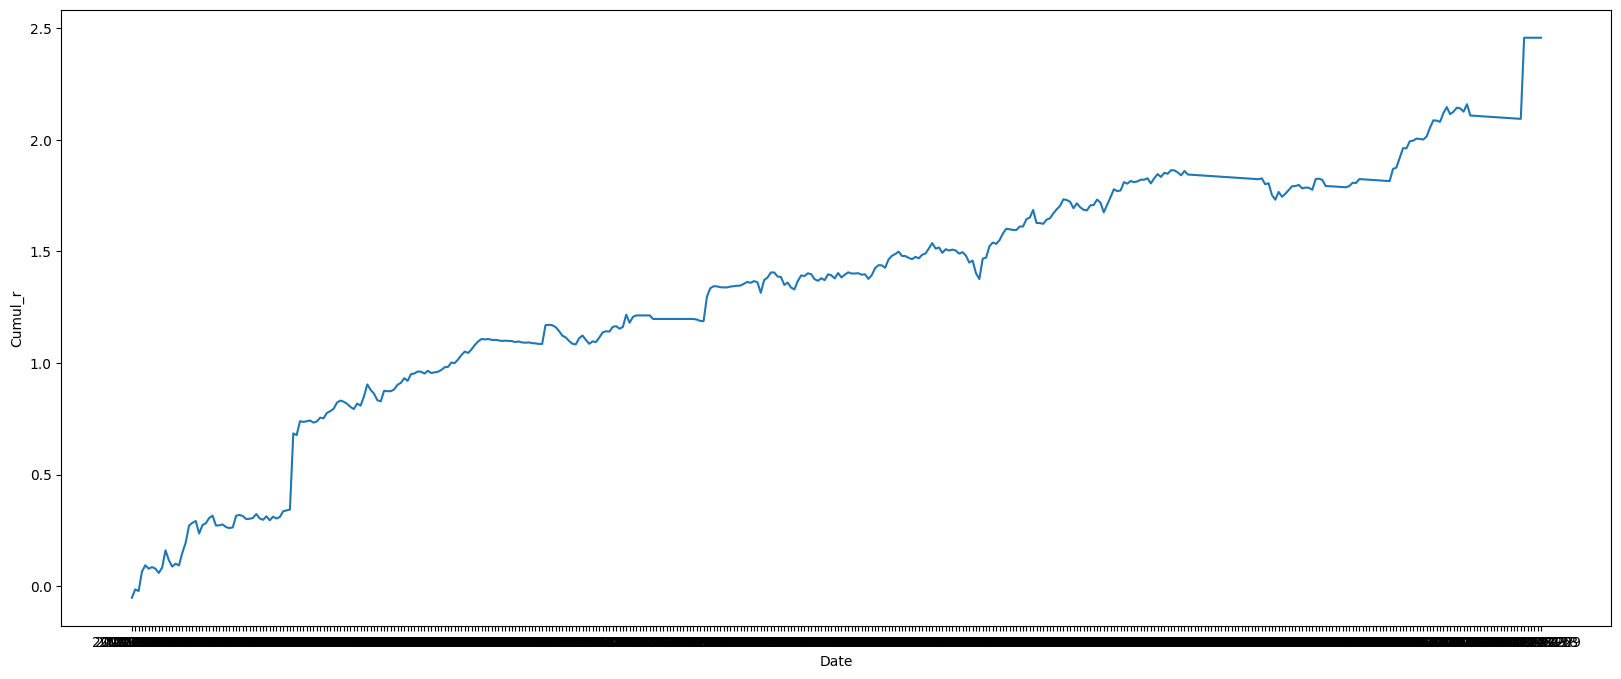

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
cumul_r = pd.DataFrame(np.cumsum(list_backtest_portfolio_r),columns=['Cumul_r'])
cumul_r['Date']=backtest_predict_data.index

sns.lineplot(x="Date", y="Cumul_r", data=cumul_r)

### Adjustment excluded the effect of new stock

In [96]:
list_backtest_portfolio_r=np.where(list_backtest_portfolio_r>0.2,0,list_backtest_portfolio_r)
stategy_property(list_backtest_portfolio_r)

Annualized Yield: 104.31%
Max Drawdown: 5.82%
Open Position Winning Ratio: 51.39%
Open Position Profit and Loss Ratio:  1.8979003857828571
Annualized Volatility: 32.82%
Sharpe Ratio:  3.1784813205077103
Calmar Ratio:  18.723191175781547


<Axes: xlabel='Date', ylabel='Cumul_r'>

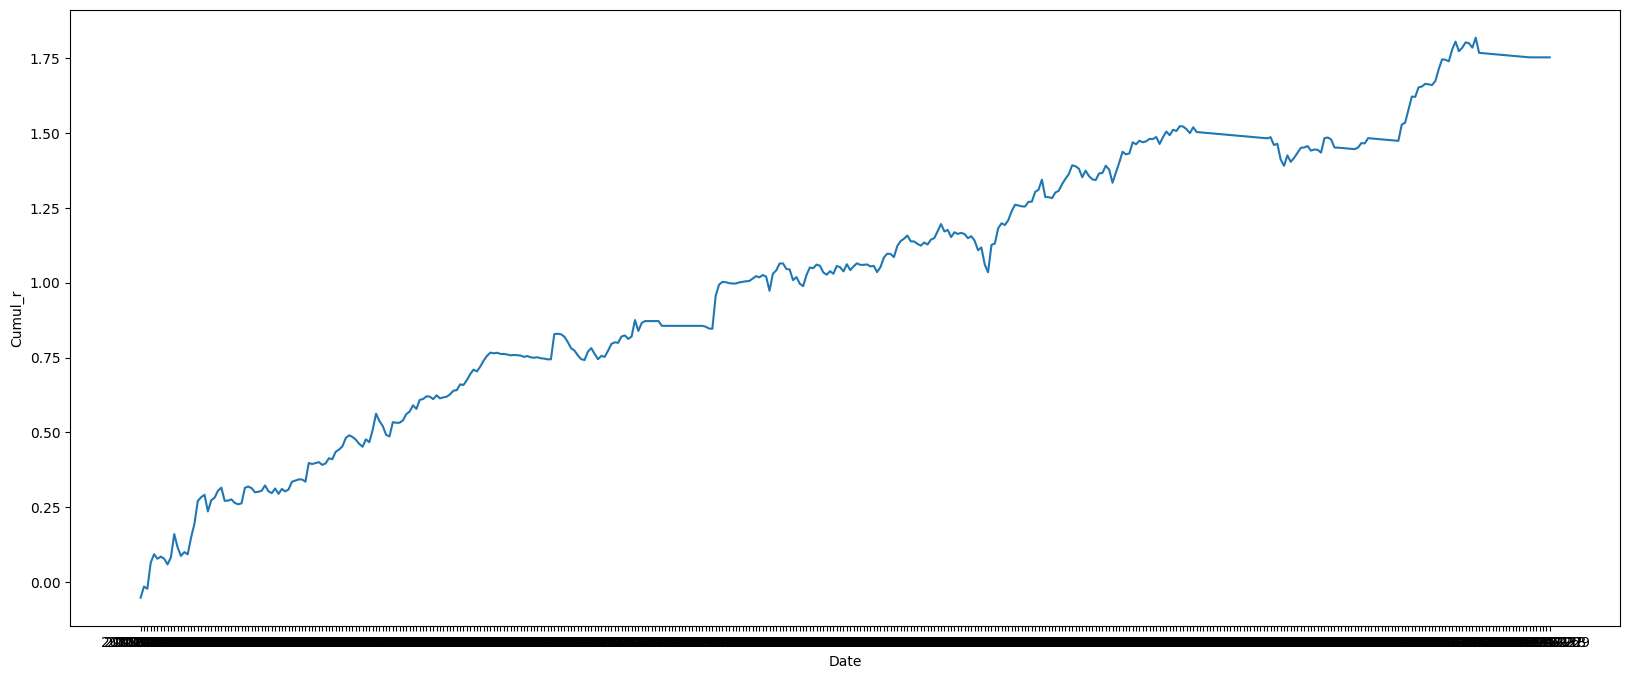

In [ ]:
cumul_r = pd.DataFrame(np.cumsum(list_backtest_portfolio_r),columns=['Cumul_r'])
cumul_r['Date']=backtest_predict_data.index
plt.figure(figsize=(20,8))
plt.tight_layout()
sns.lineplot(x="Date", y="Cumul_r", data=cumul_r)